# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.58'

## Specifying filetype, and folder as before

In [3]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [20]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [21]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'10mol_FID_R1.txt'

### Lets plot the diad to have a look at it

10mol_FID_R1.txt


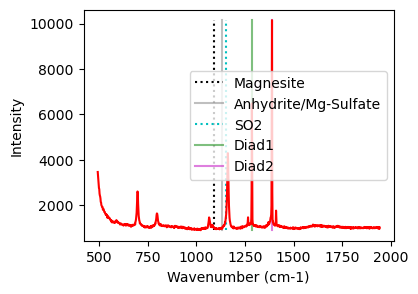

In [22]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [23]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [24]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1250, 1275),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=5486.6404798749, HB_prom=463.85753871945883, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.534616       1285.534766          0.0195      17339.915922   

   Diad1_Voigt_Sigma Diad1_Voigt_Gamma     HB1_Cent     HB1_Area  HB1_Sigma  \
0           1.101368              None  1265.475692  4411.309264   3.285099   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0            5704.425662       63.864222        0.713984    2.202737   

                     Diad1_refit  
0  Flagged Warnings: HB1_HighAmp

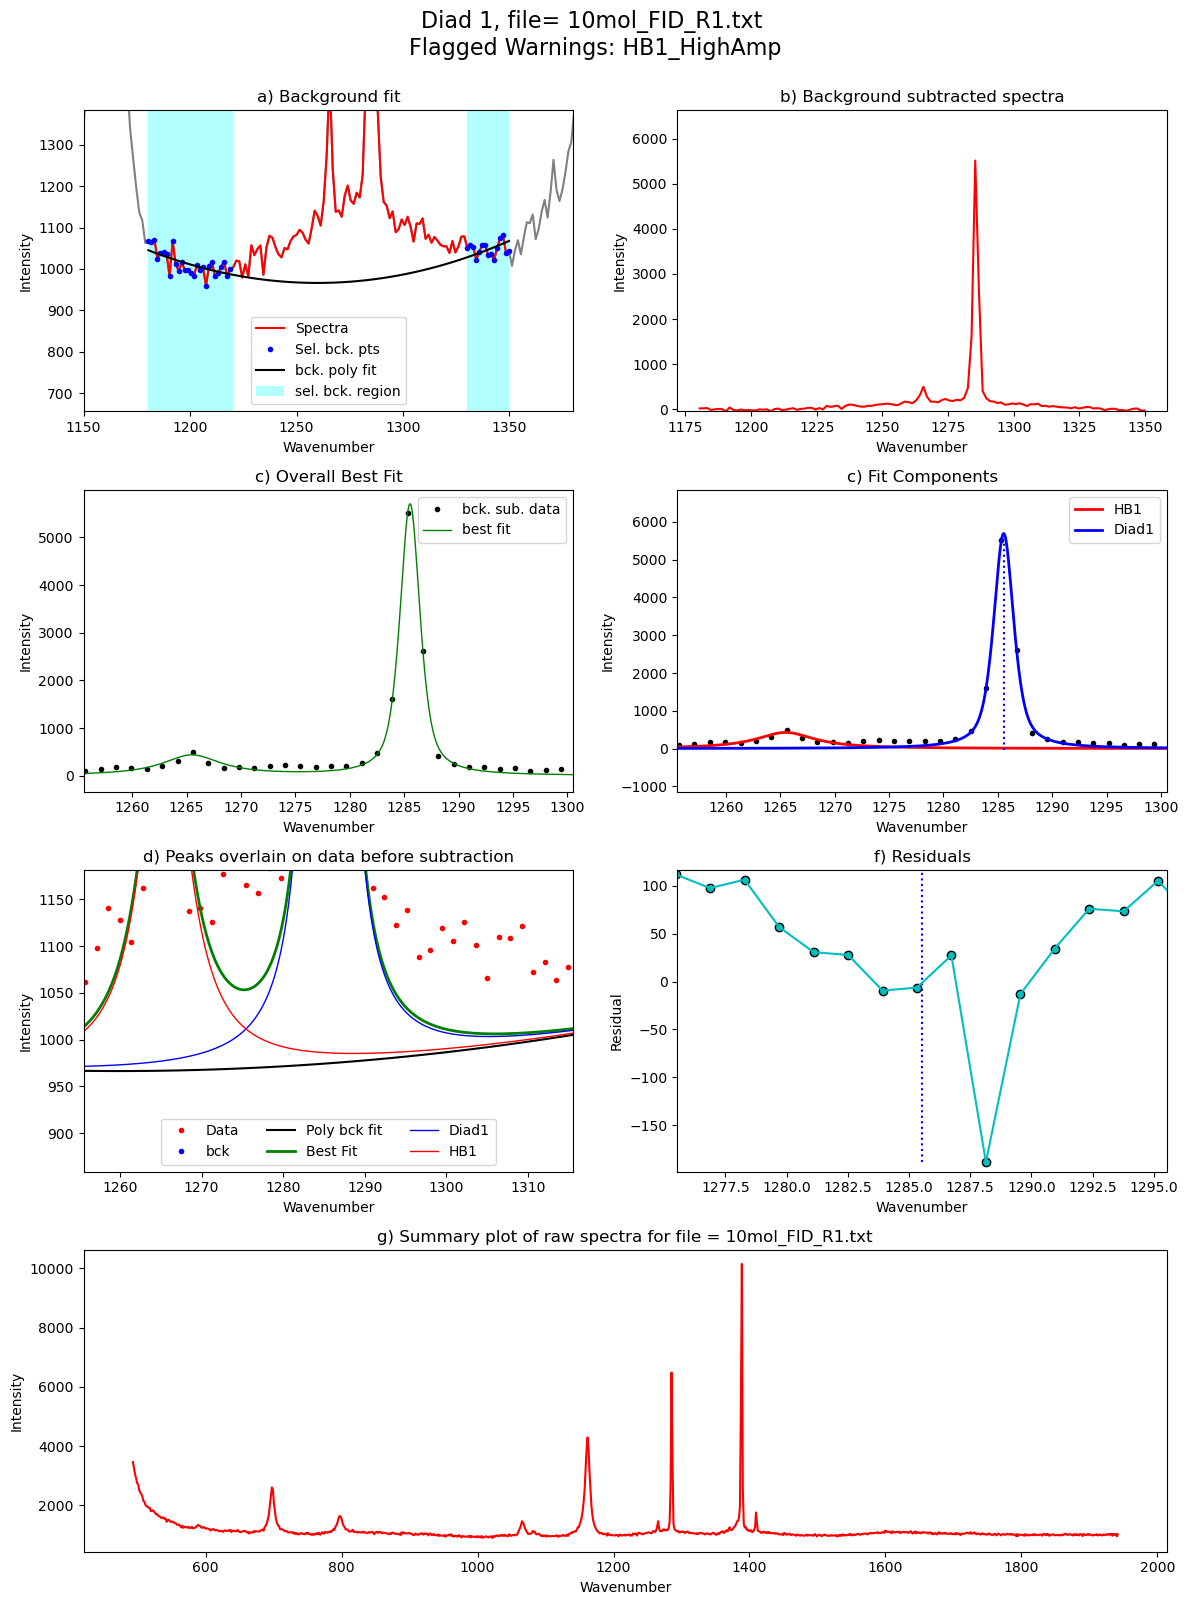

In [25]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [26]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [27]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1393, 1399),
    lower_bck_diad2=(1378, 1384), diad_sigma=1,  N_poly_bck_diad2=1,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2,
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=1,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=1, lower_bck_diad2=(1310, 1340), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=1000, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=9224.272171674049, HB_prom=746.9267532430453, x_range_baseline=30, y_range_baseline=1000, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=99.33880539027678)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.434528       1388.434478           0.016      15400.838413   

   Diad2_Voigt_Sigma Diad2_Voigt_Gamma     HB2_Cent     HB2_Area  HB2_Sigma  \
0           0.826771              None  1409.950561  1784.542766   1.171028   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0            6742.500571       24.175938        0.712209    1.653541   

         Diad2_refit  
0  Flagged Warnings:

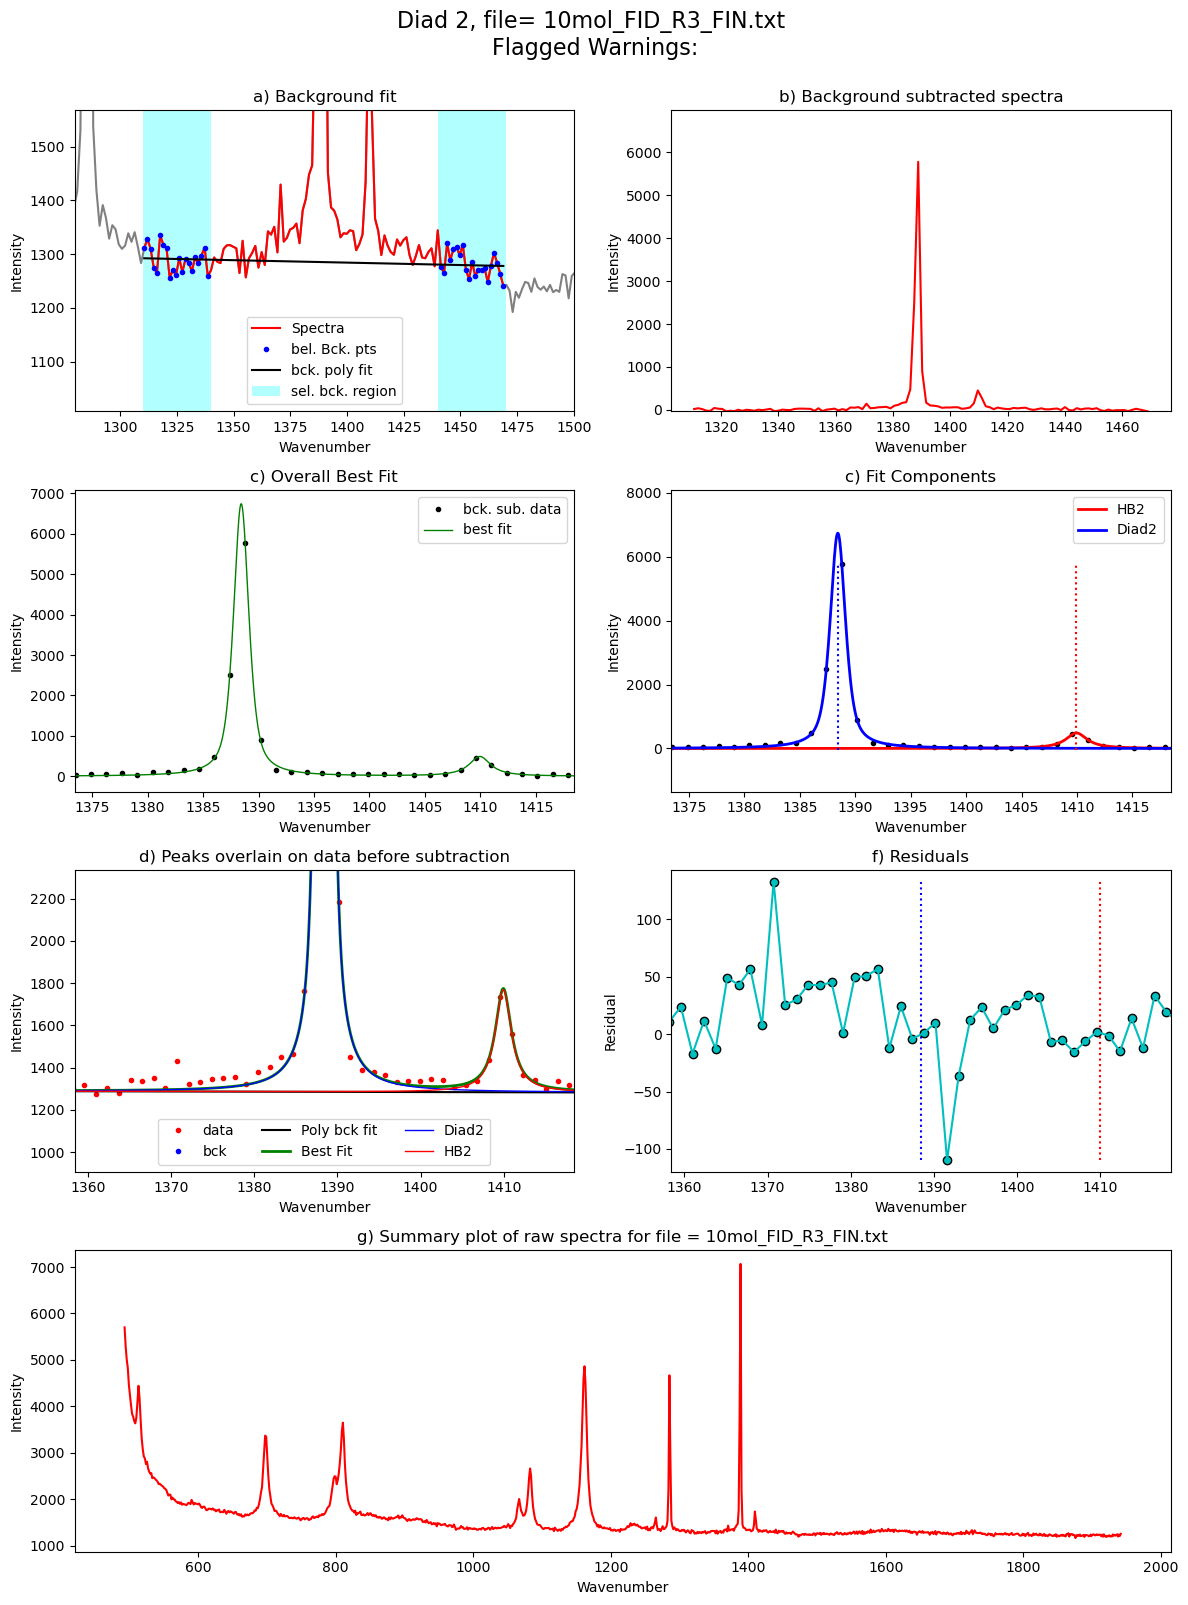

In [28]:
i=5
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

### Update the sigma

In [29]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.8267705086891641


## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/11 [00:00<?, ?it/s]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


  9%|▉         | 1/11 [00:03<00:35,  3.51s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 18%|█▊        | 2/11 [00:10<00:50,  5.61s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 27%|██▋       | 3/11 [00:16<00:47,  5.90s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 36%|███▋      | 4/11 [00:19<00:33,  4.81s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 45%|████▌     | 5/11 [00:22<00:24,  4.12s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 55%|█████▍    | 6/11 [00:26<00:20,  4.03s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 64%|██████▎   | 7/11 [00:31<00:16,  4.14s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 73%|███████▎  | 8/11 [00:36<00:13,  4.41s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 82%|████████▏ | 9/11 [00:39<00:08,  4.18s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


 91%|█████████ | 10/11 [00:42<00:03,  3.89s/it]

refit attempt 1
Flagged Warnings: HB1_HighAmp
refit attempt  =2, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =3, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =4, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
refit attempt  =5, Flagged Warnings: HB1_HighAmp
Flagged Warnings: HB1_HighAmp
Got to 5 iteratoins and still couldnt adjust the fit parameters


g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:2816: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
100%|██████████| 11/11 [00:46<00:00,  4.19s/it]


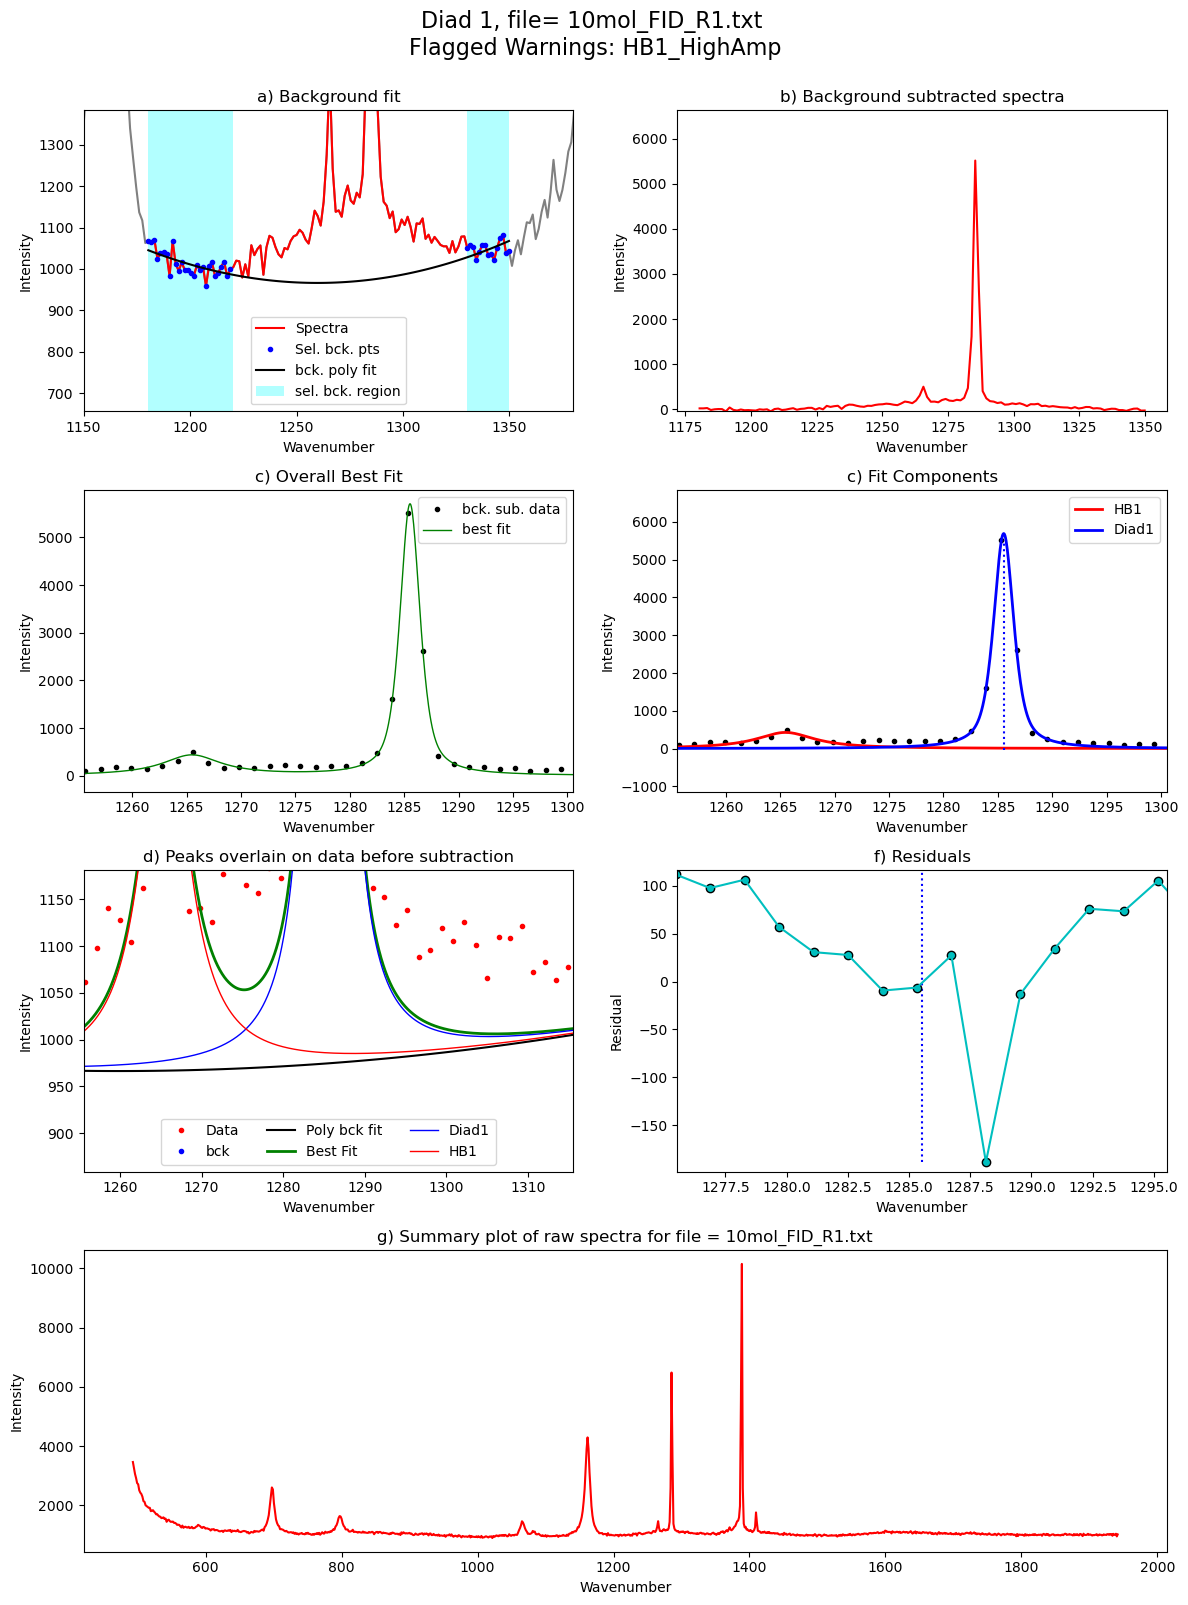

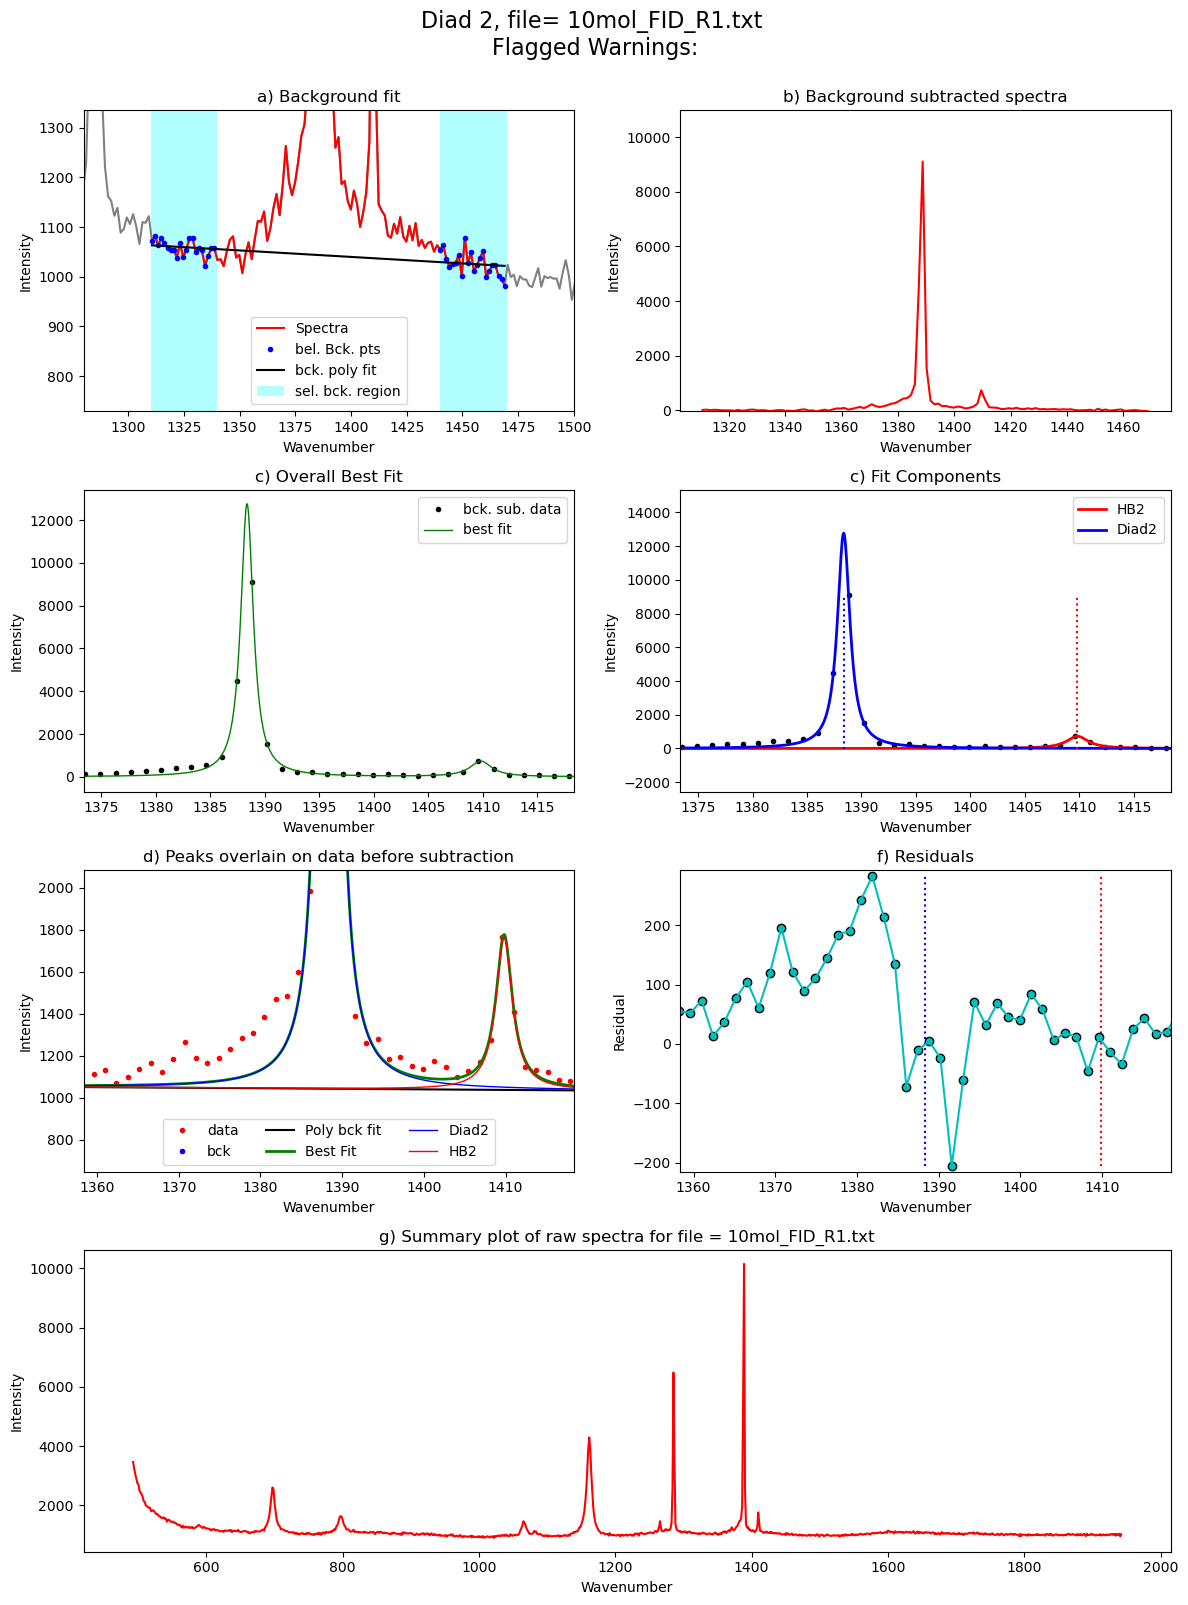

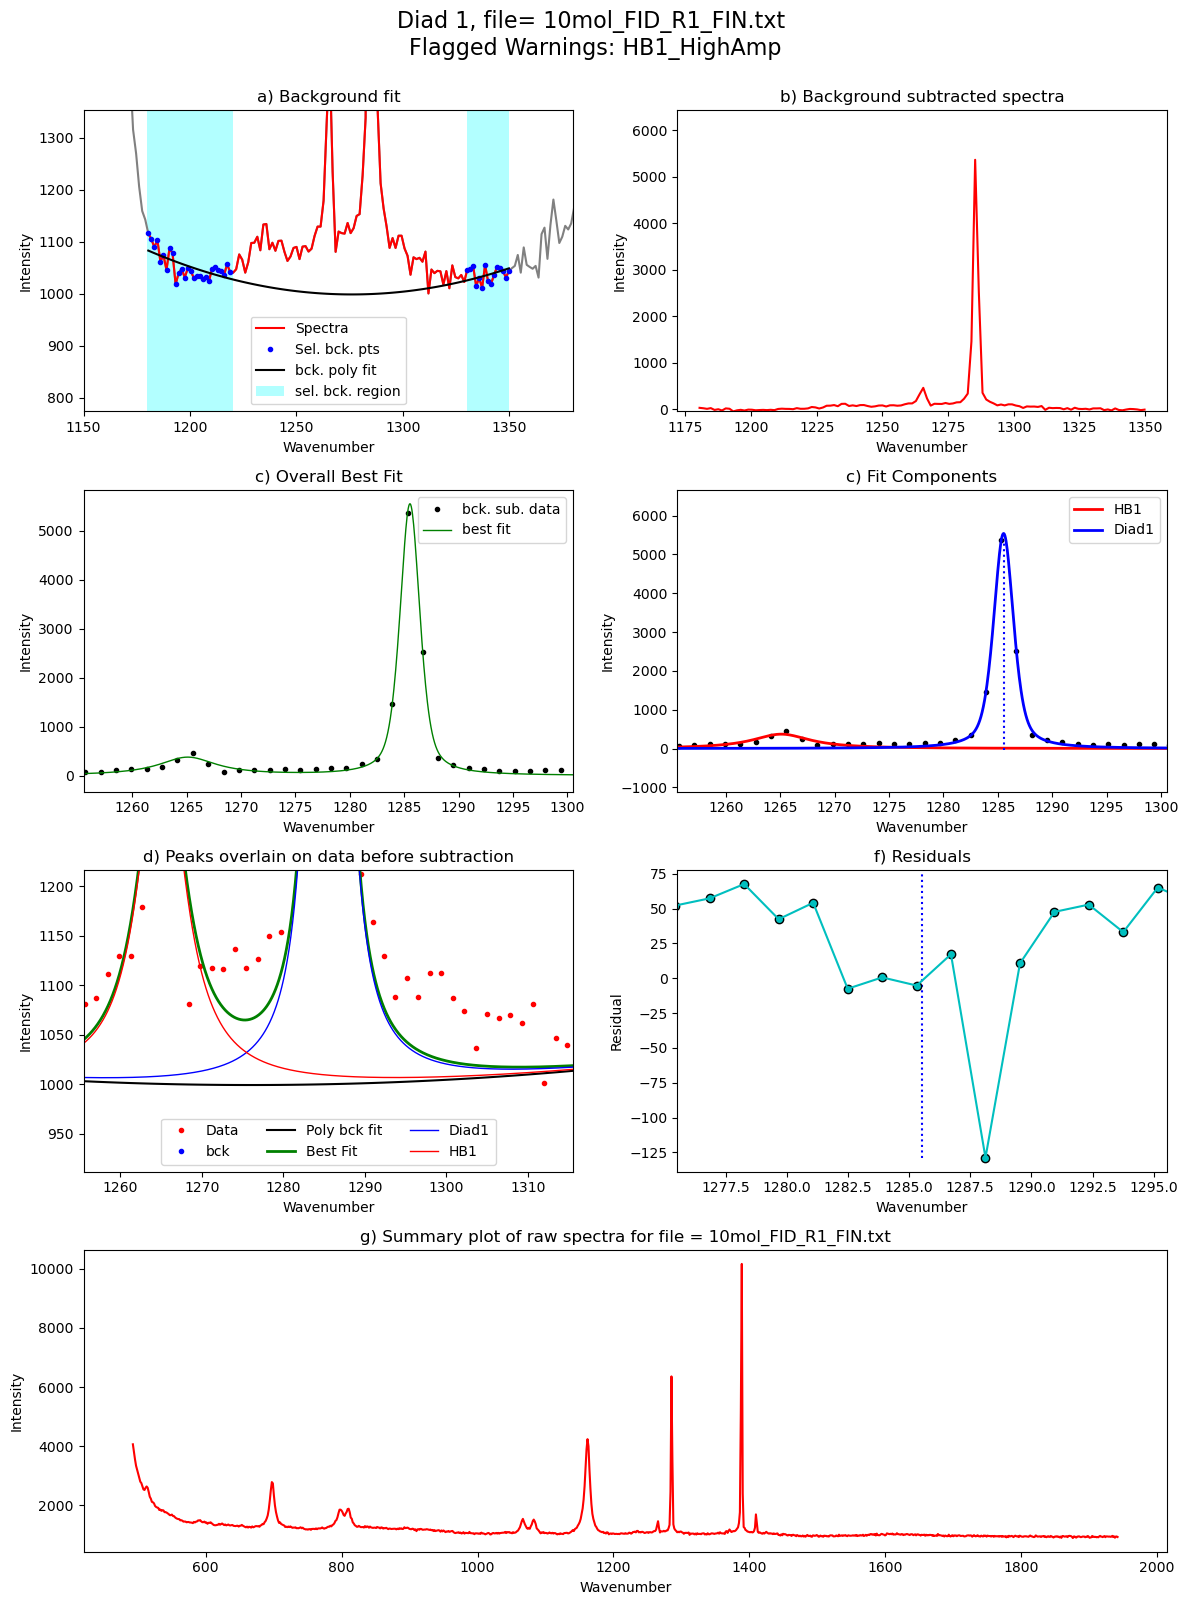

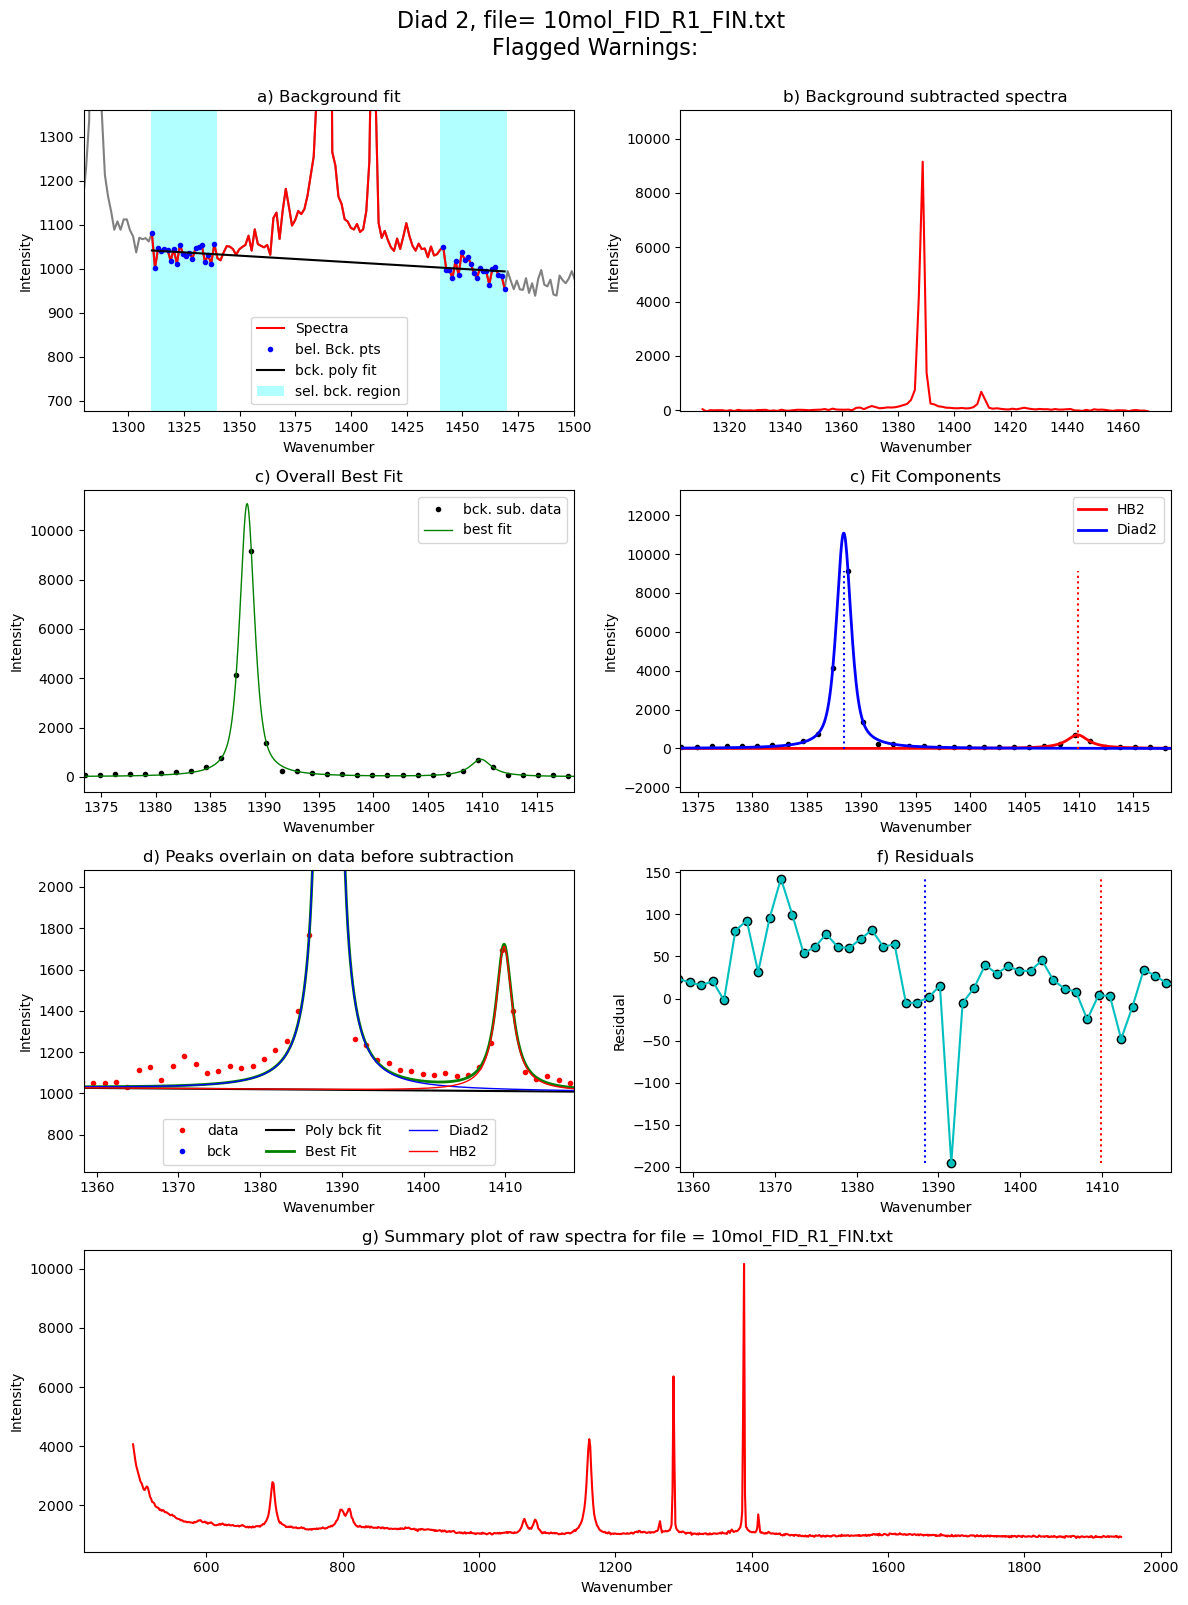

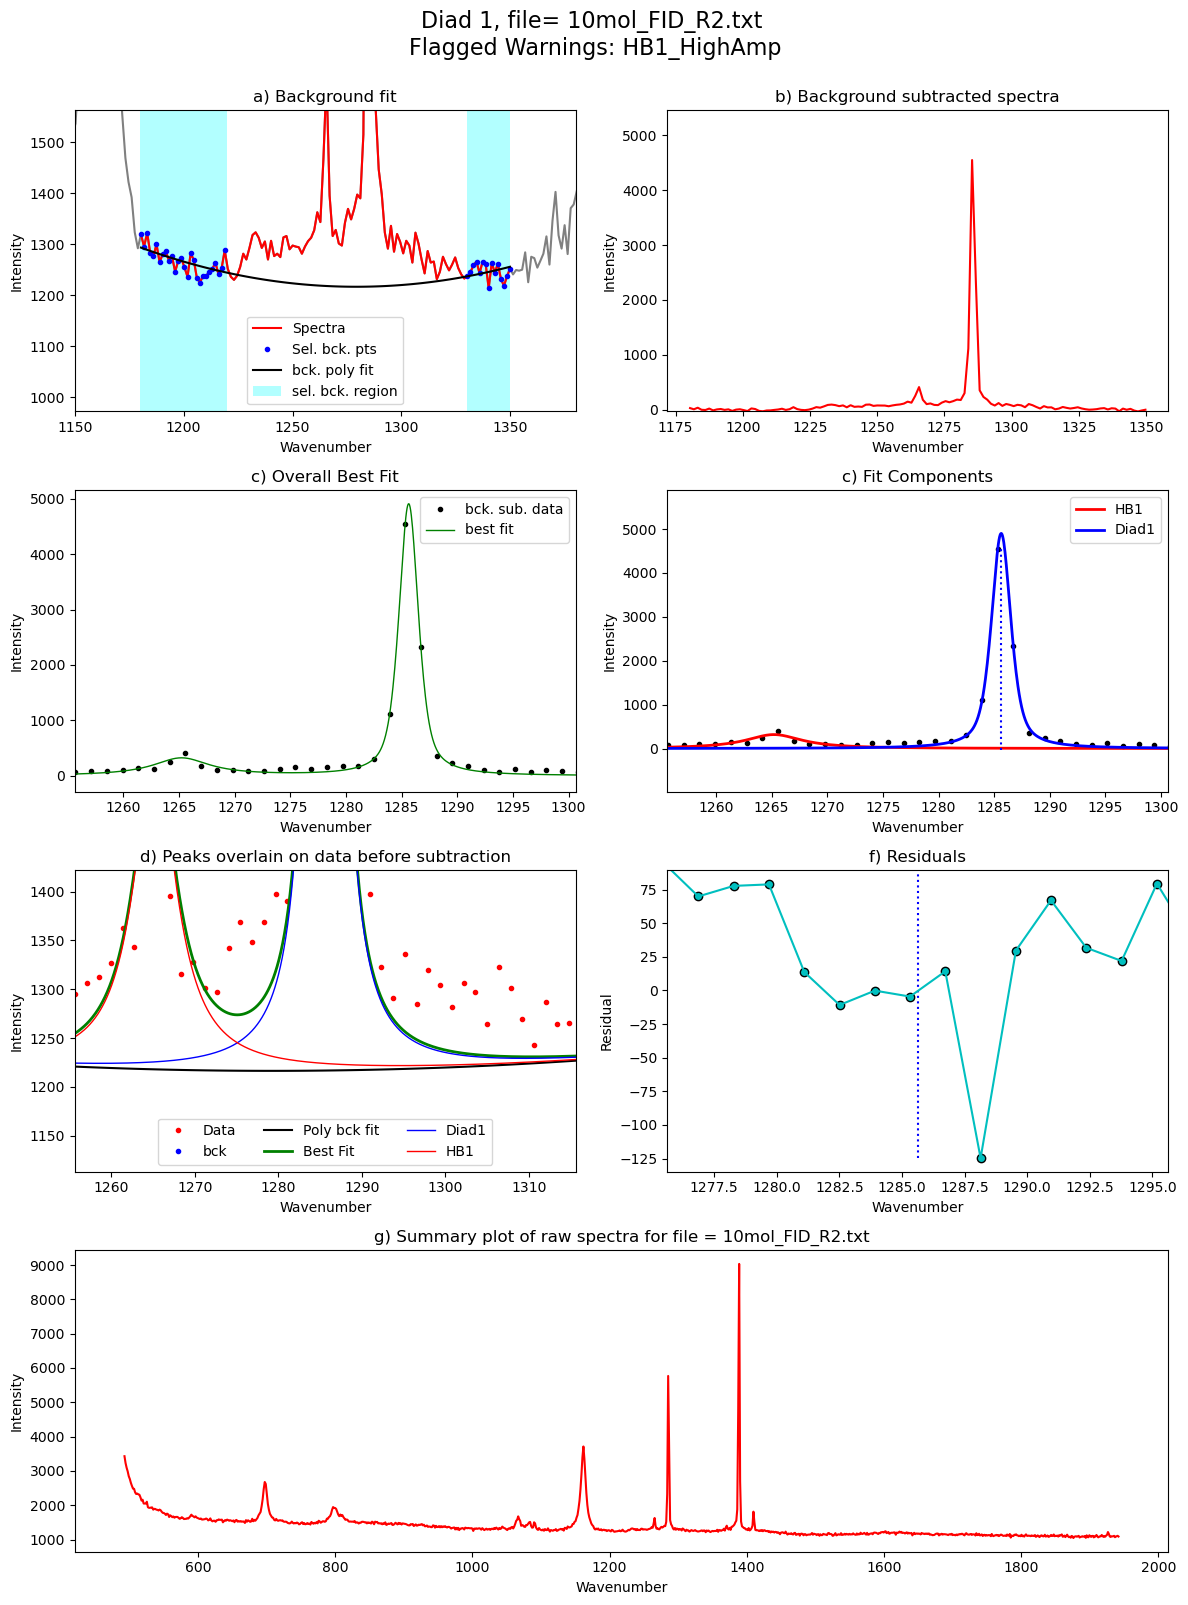

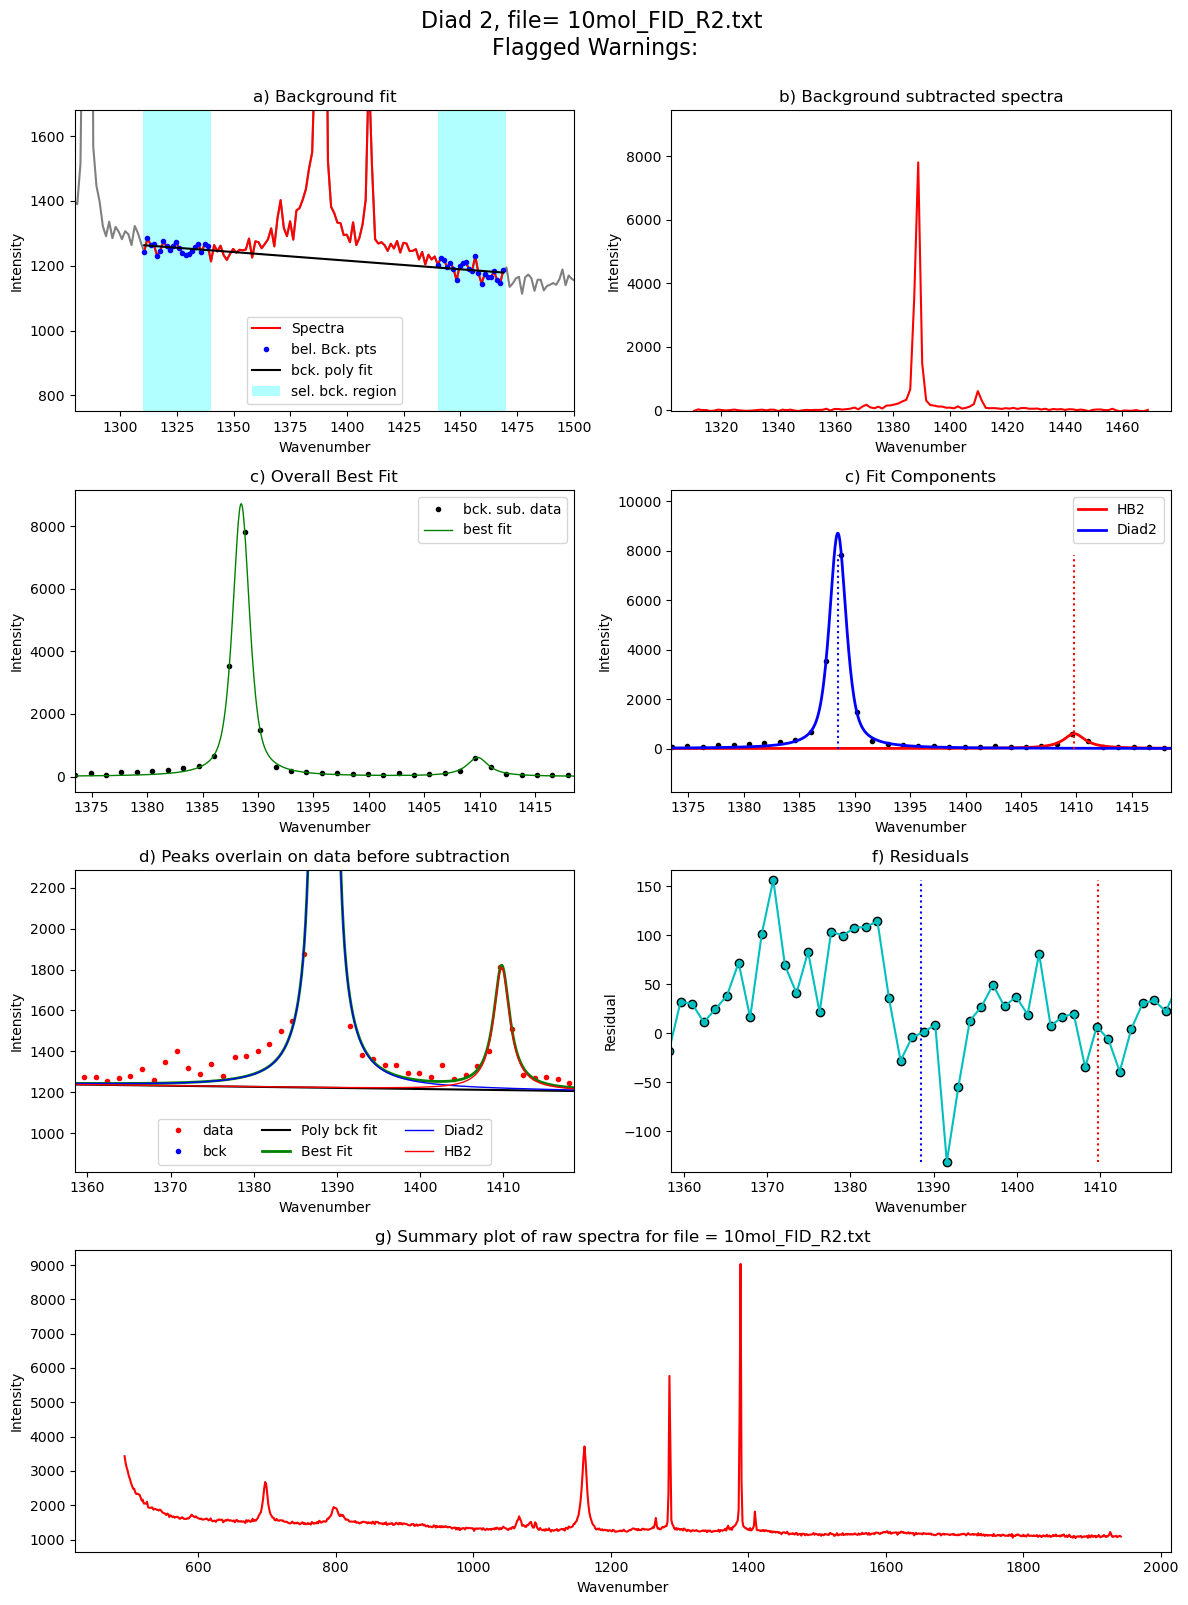

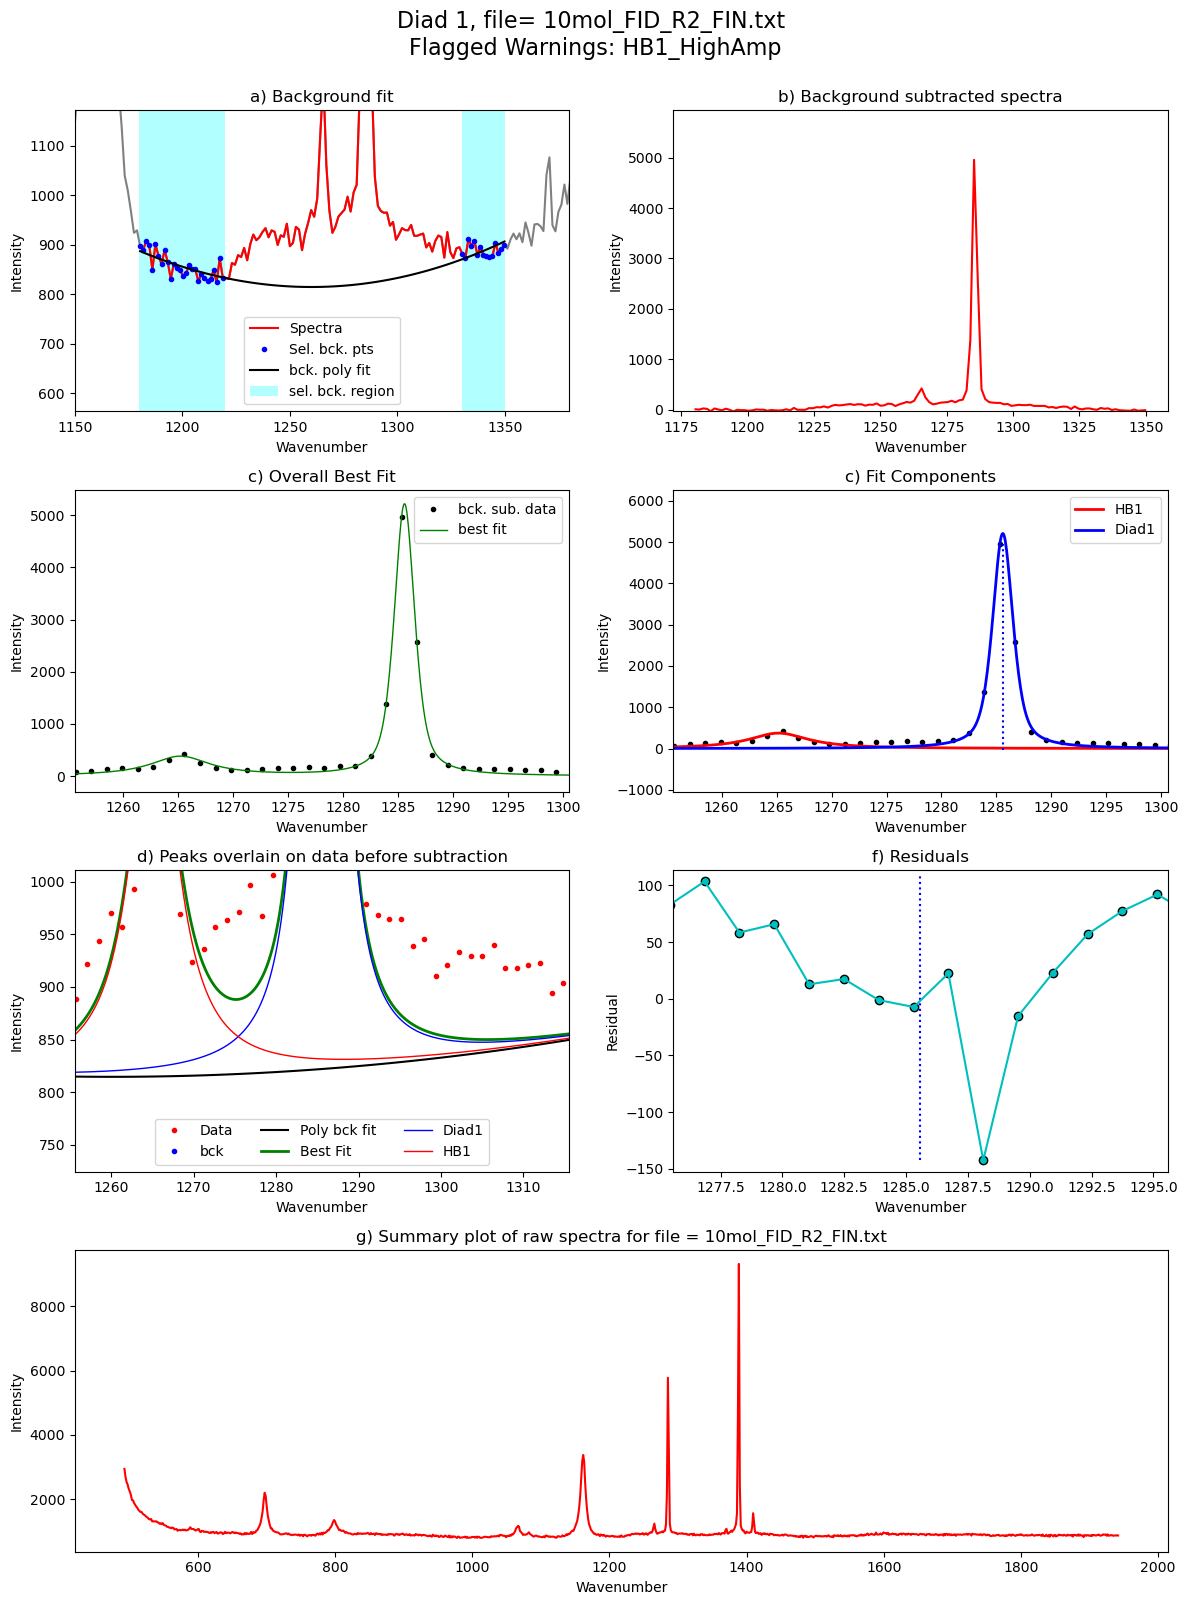

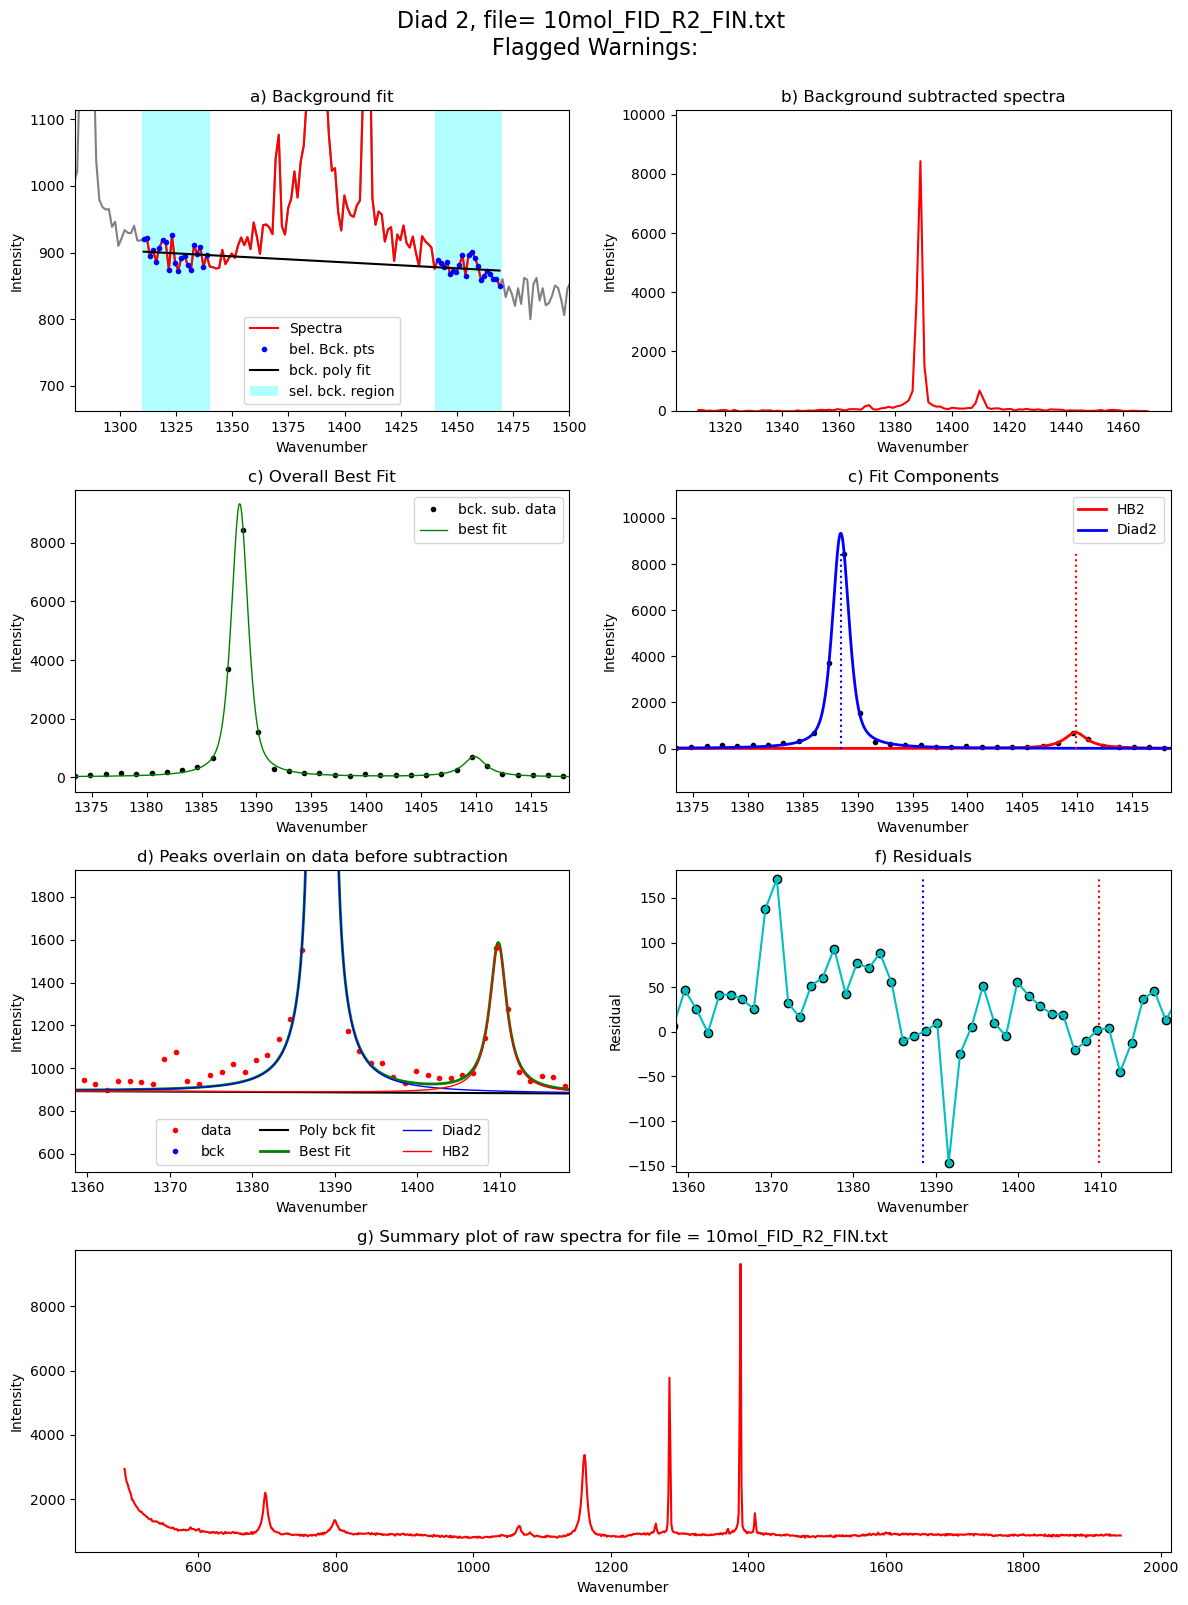

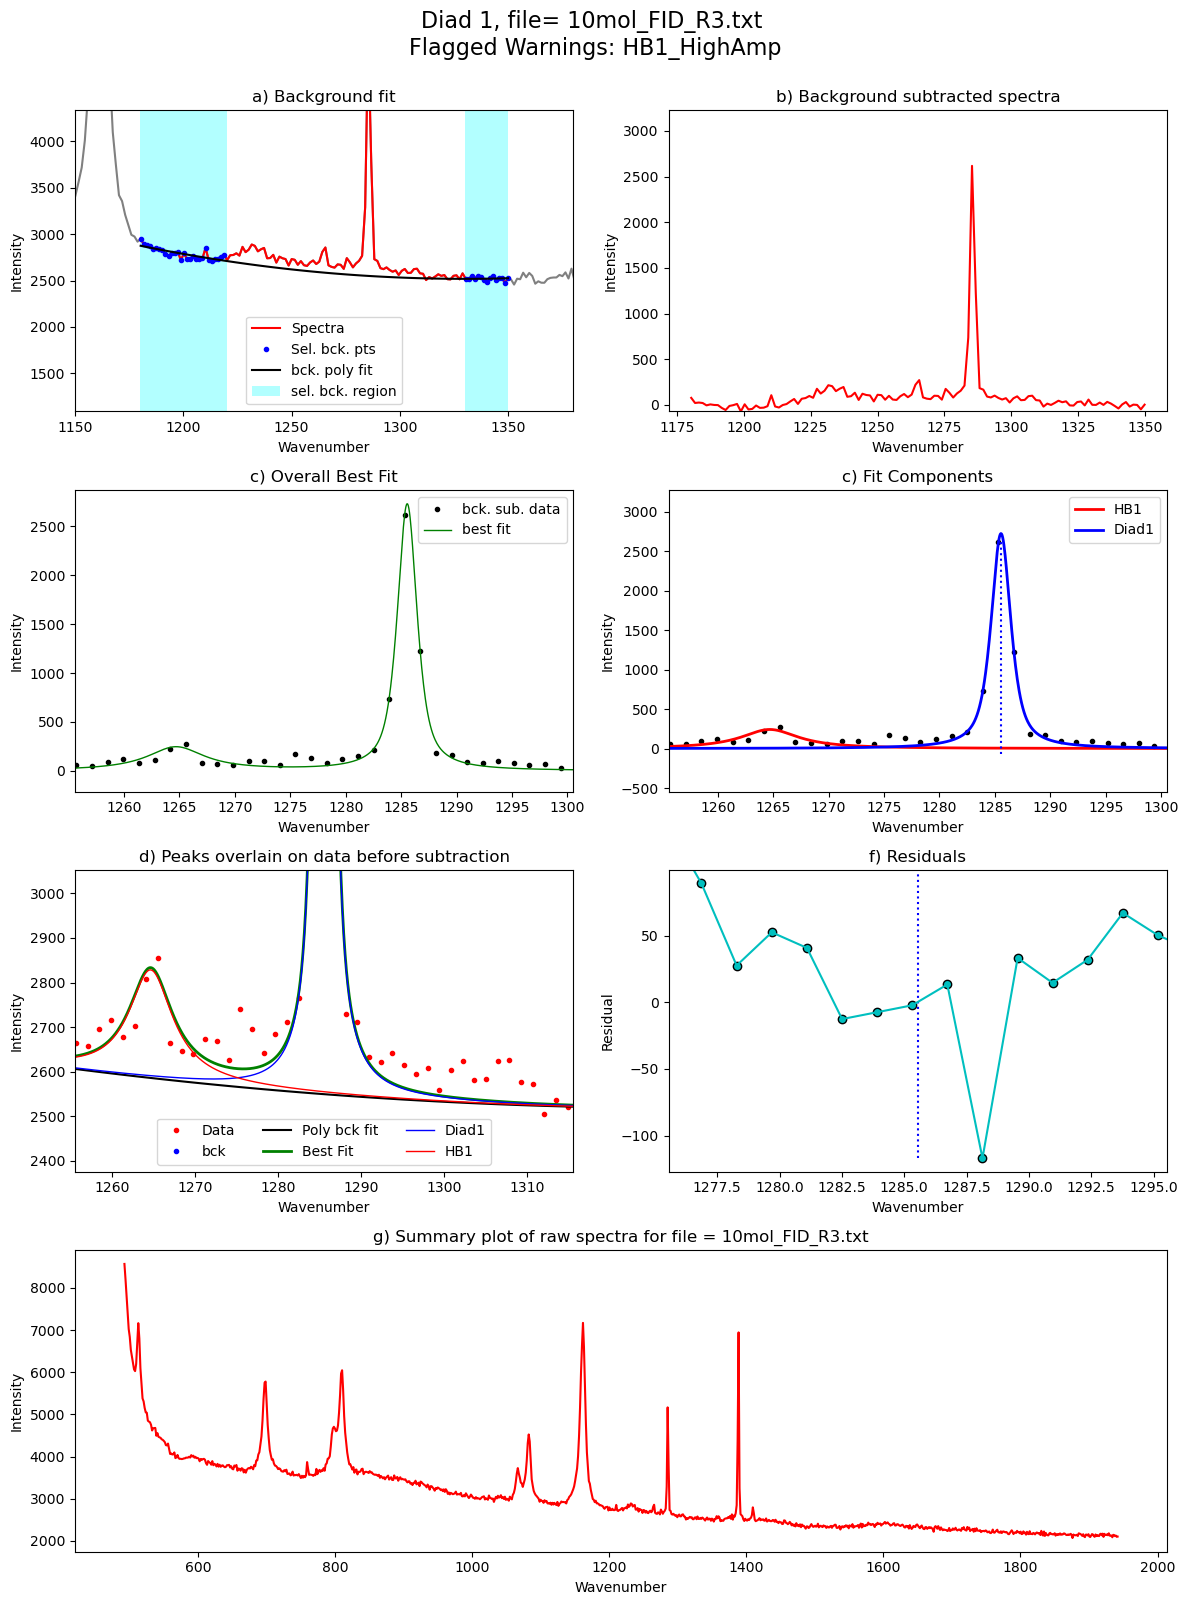

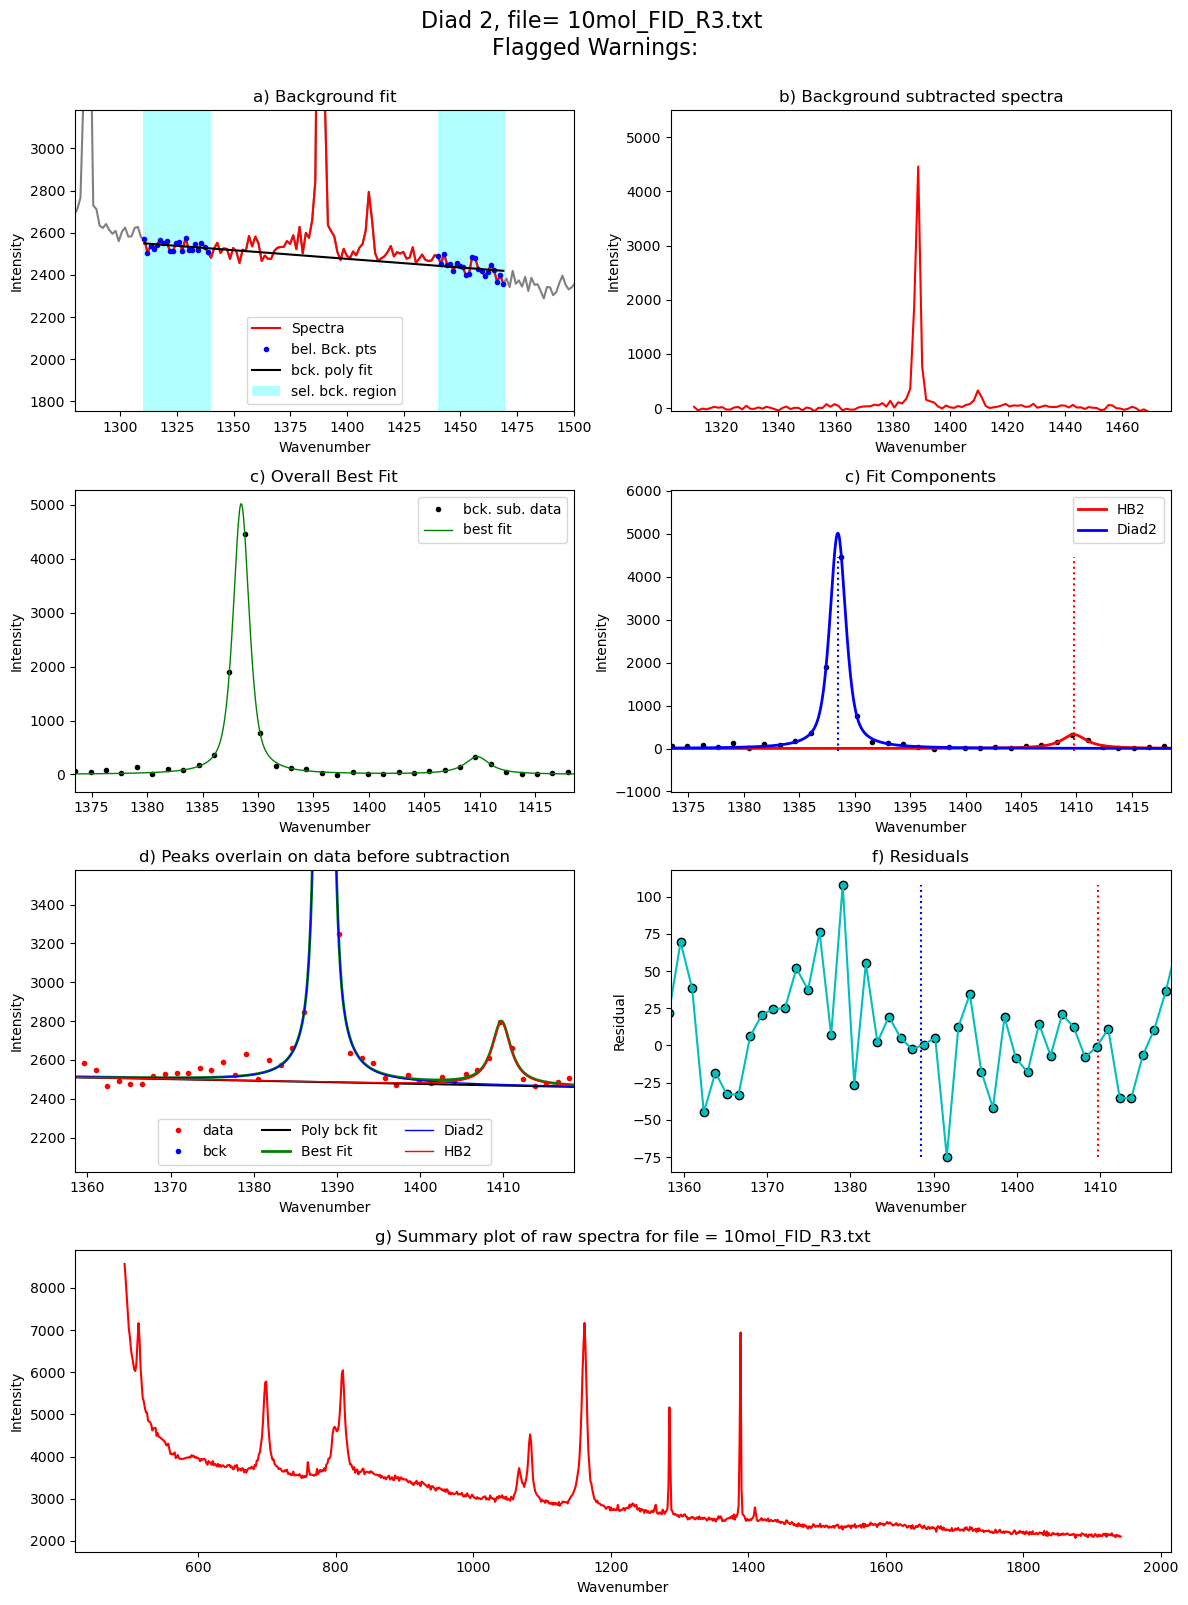

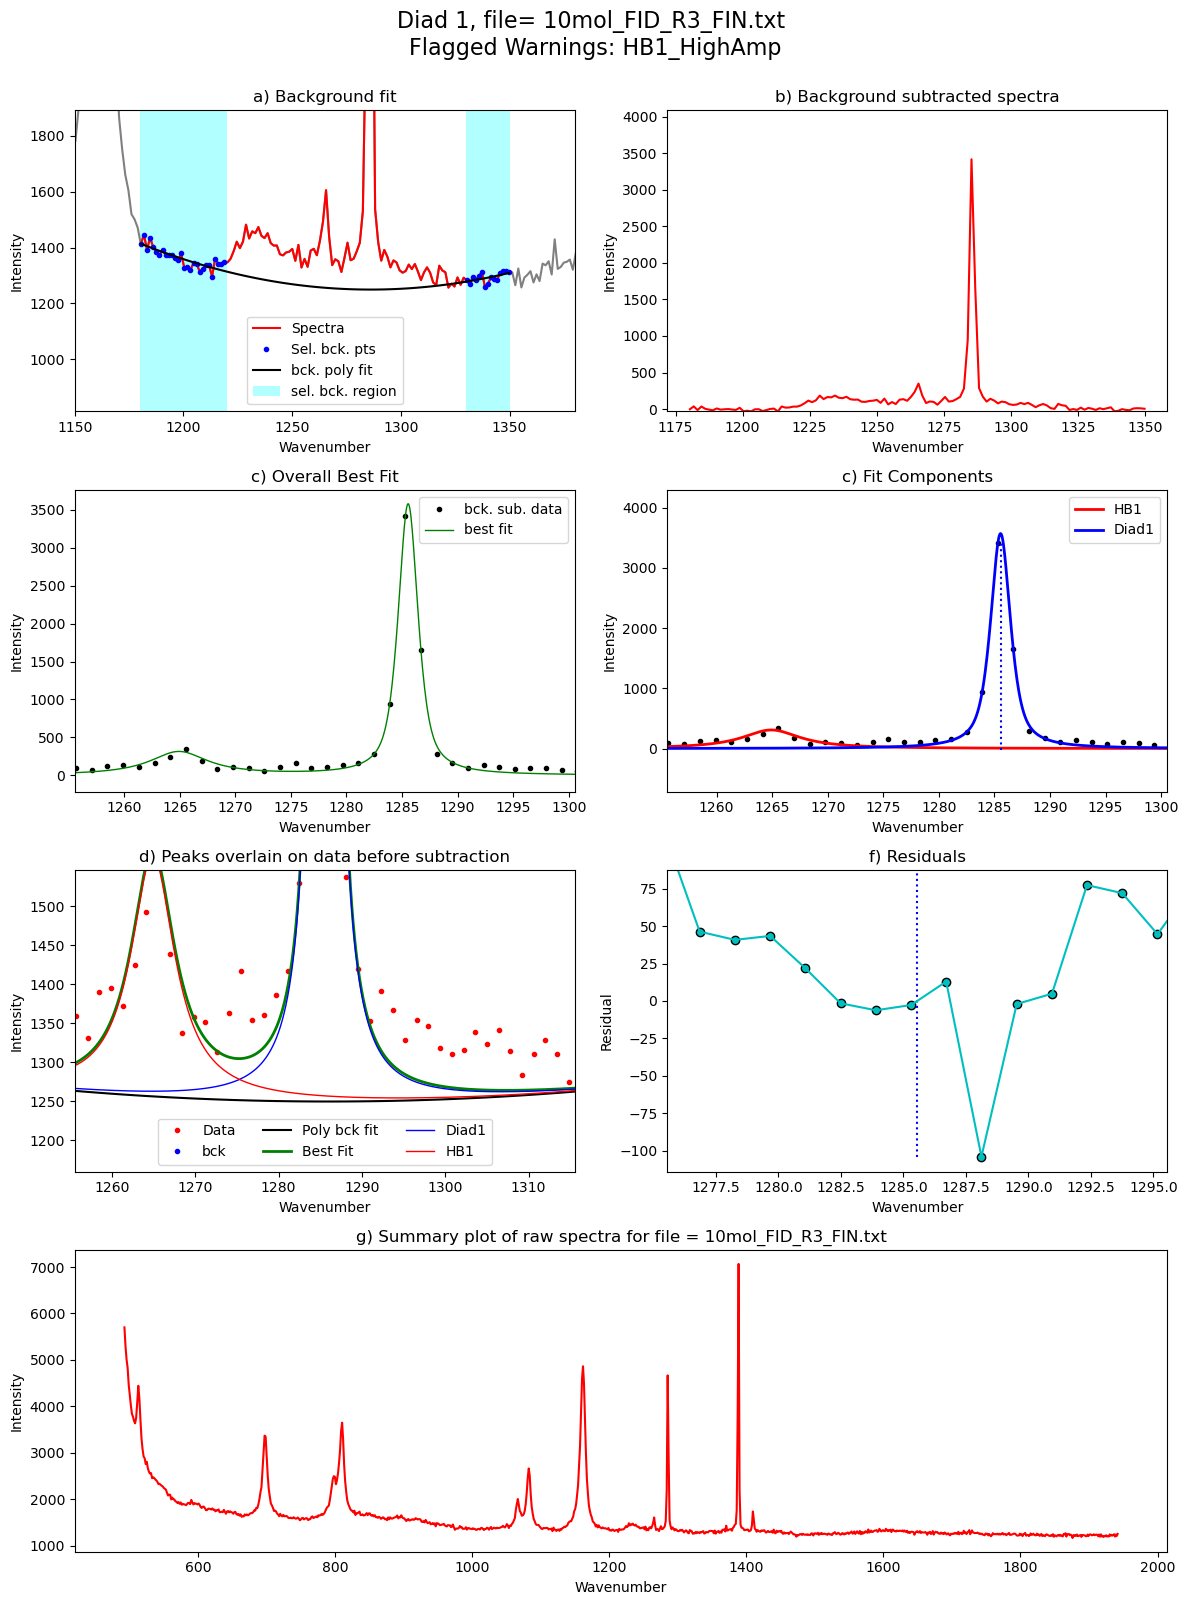

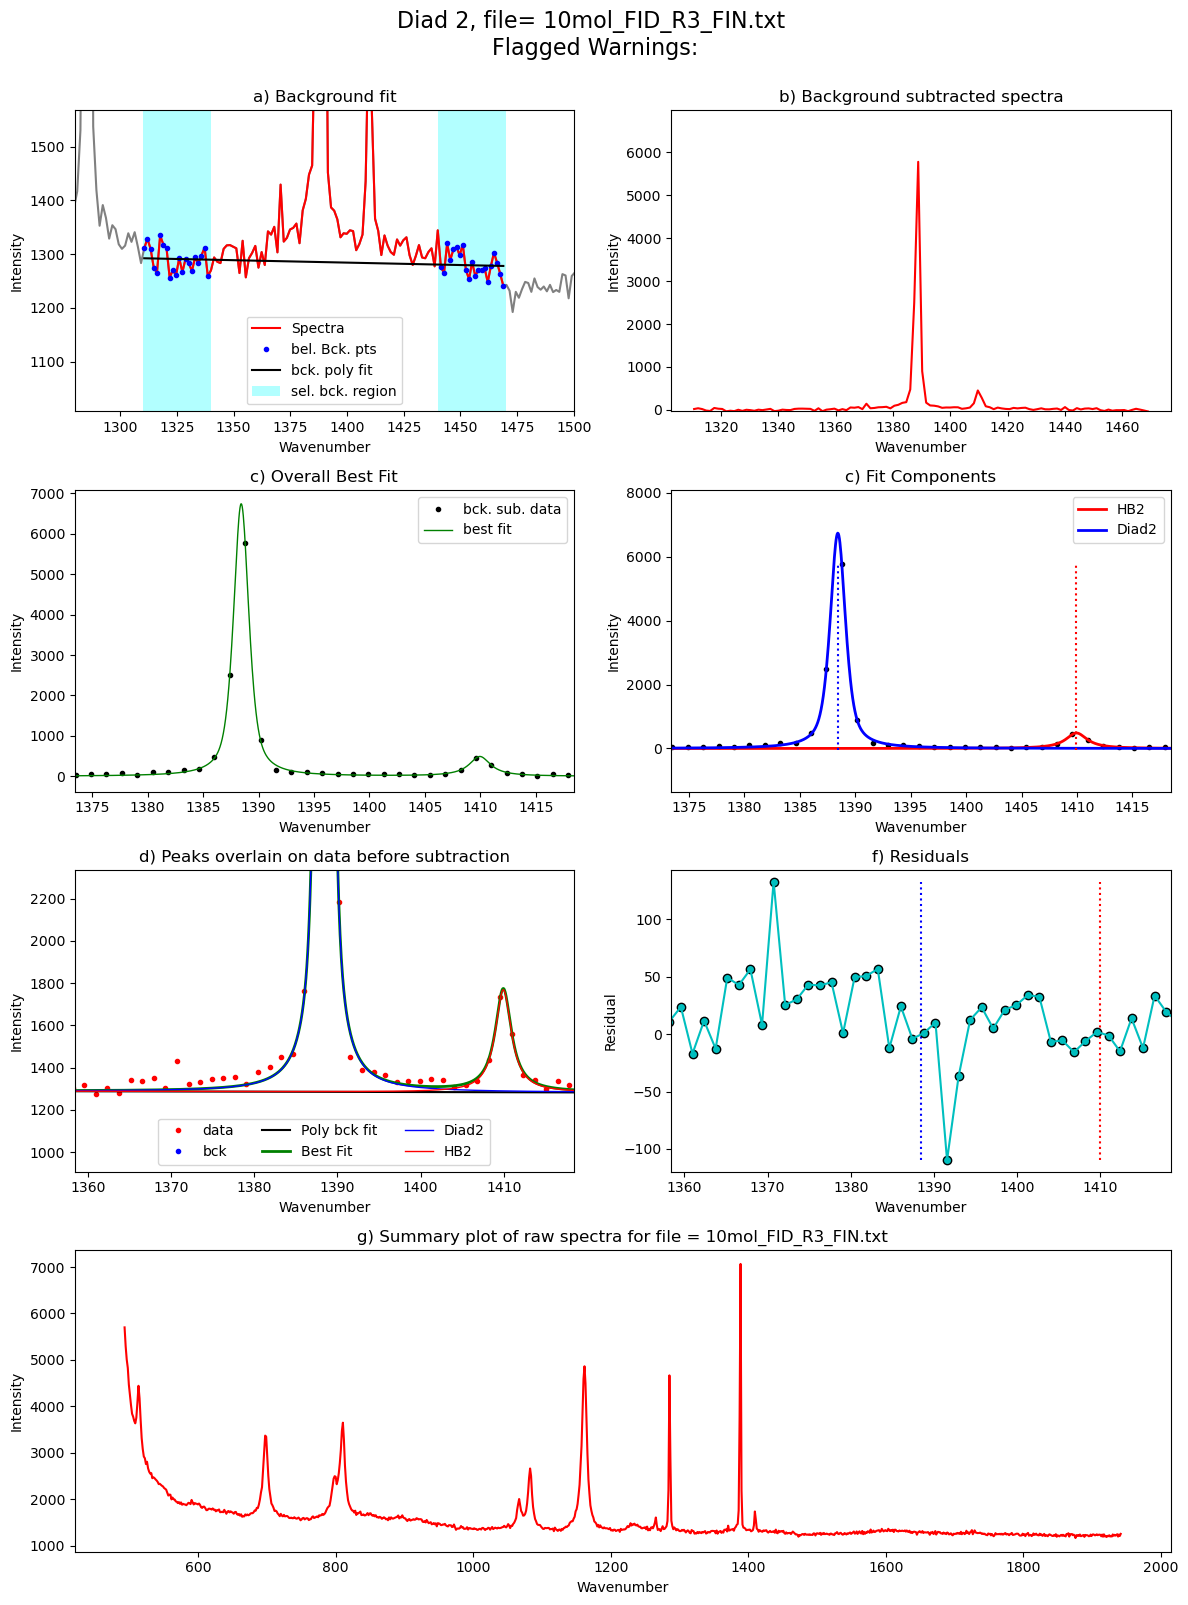

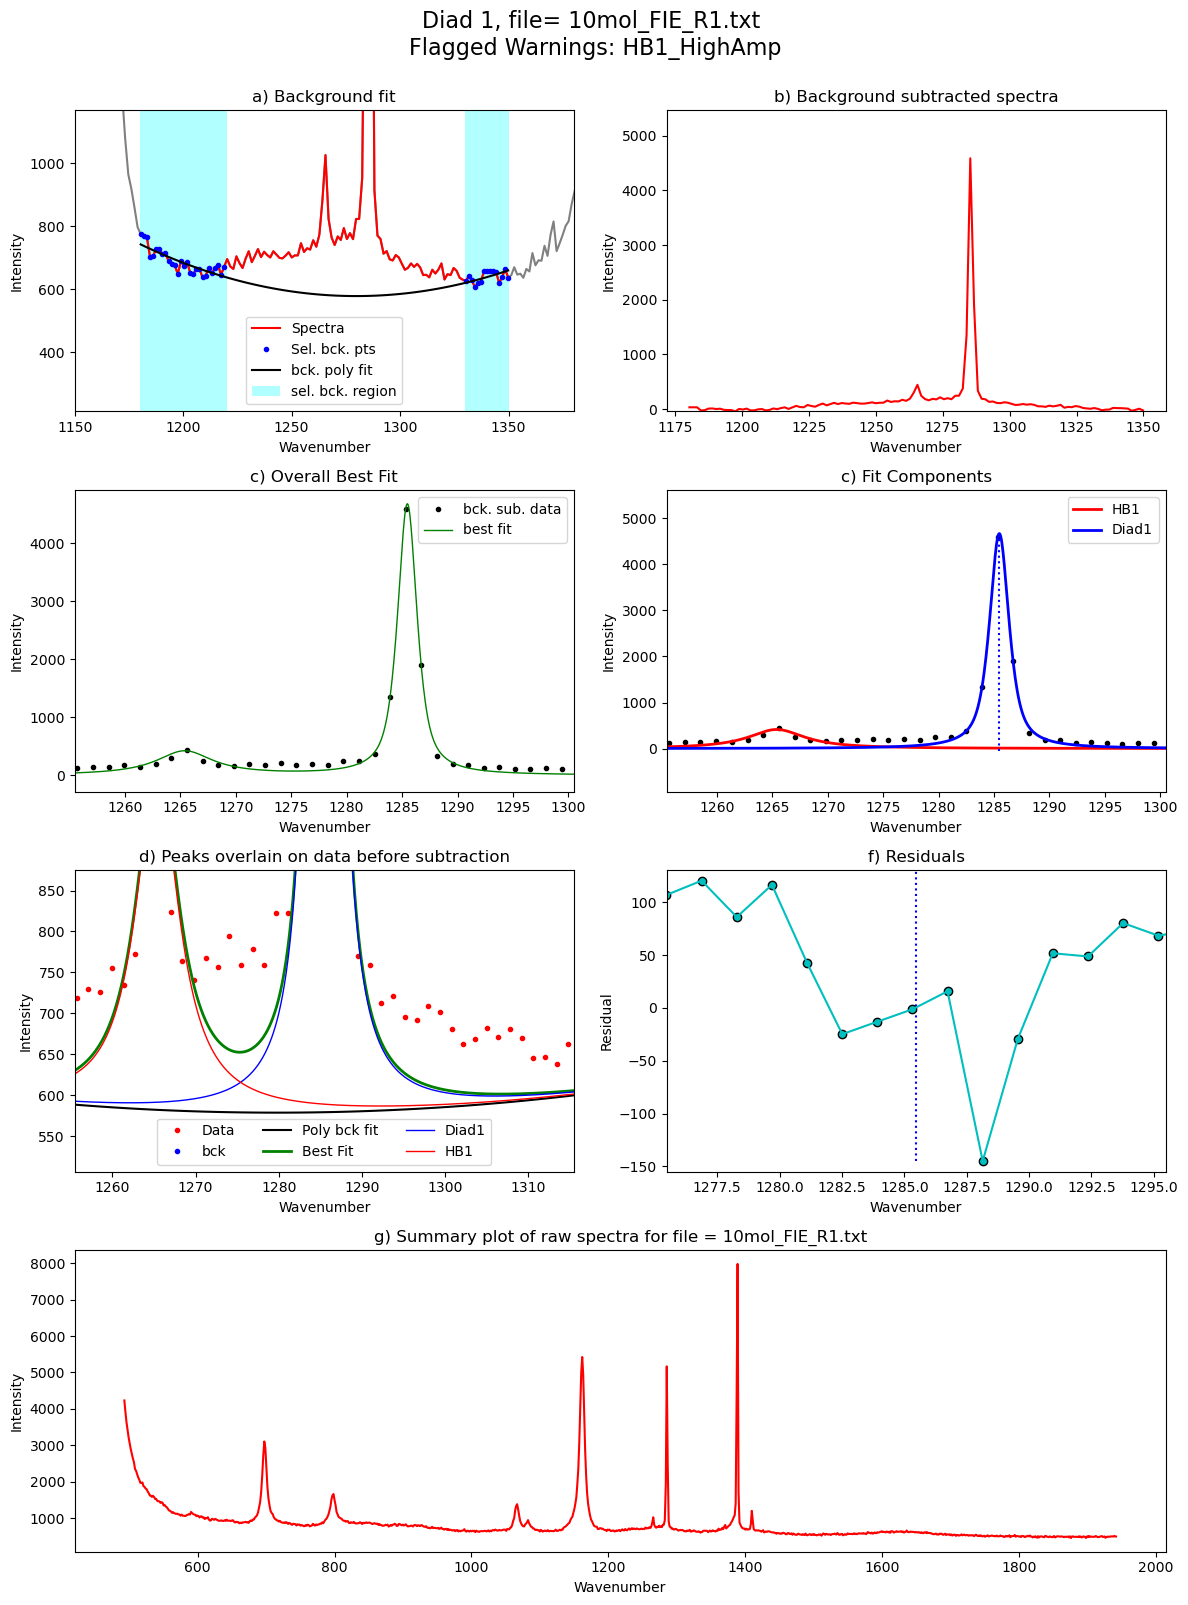

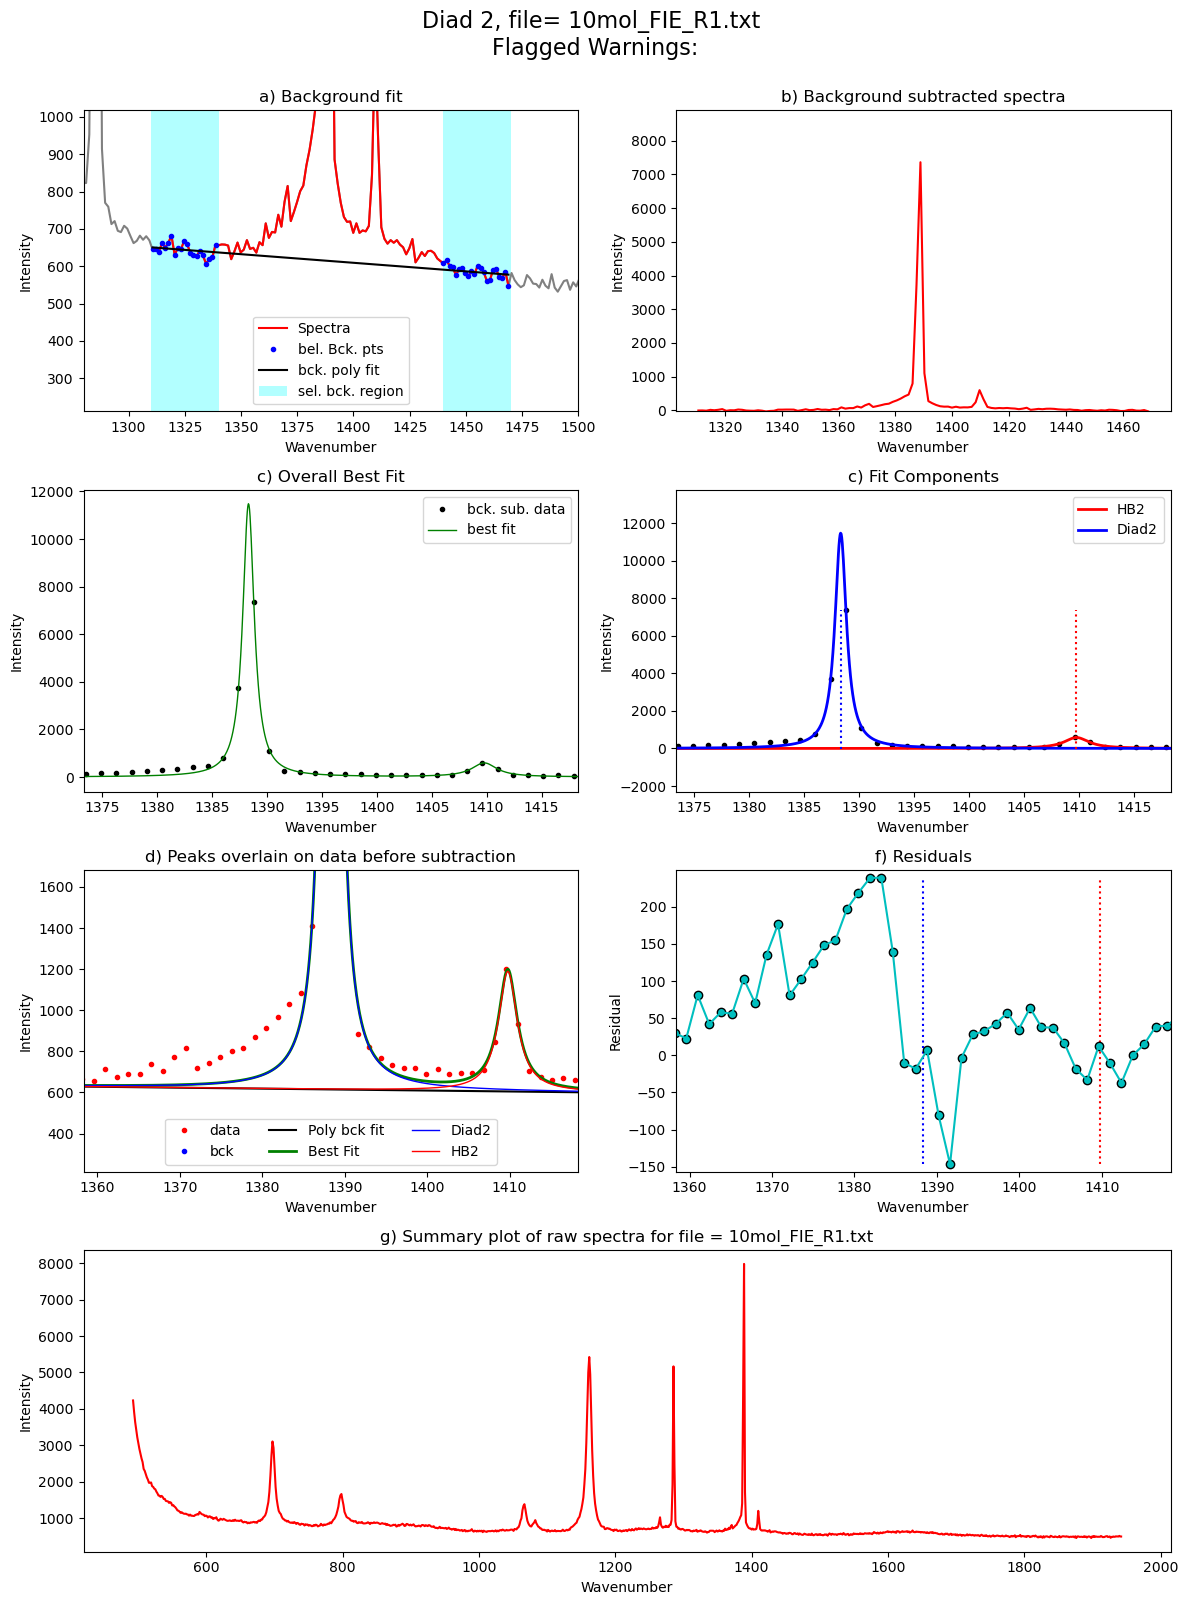

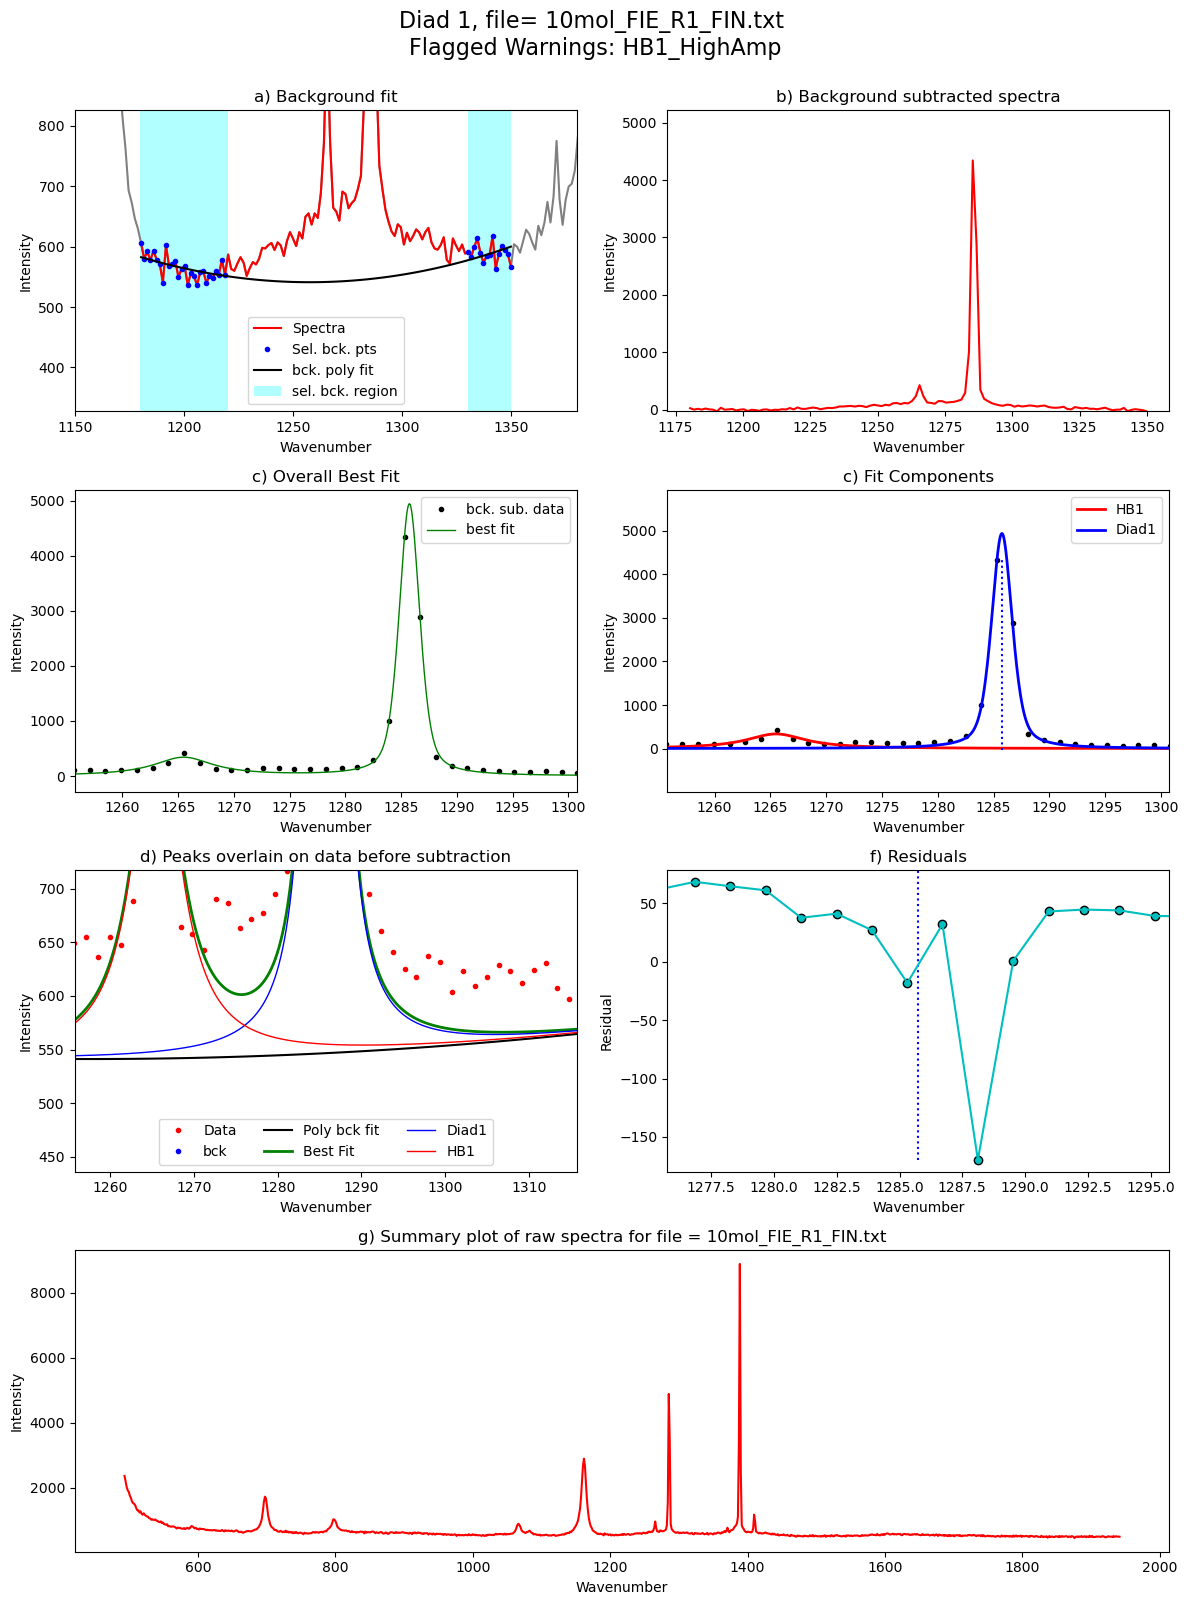

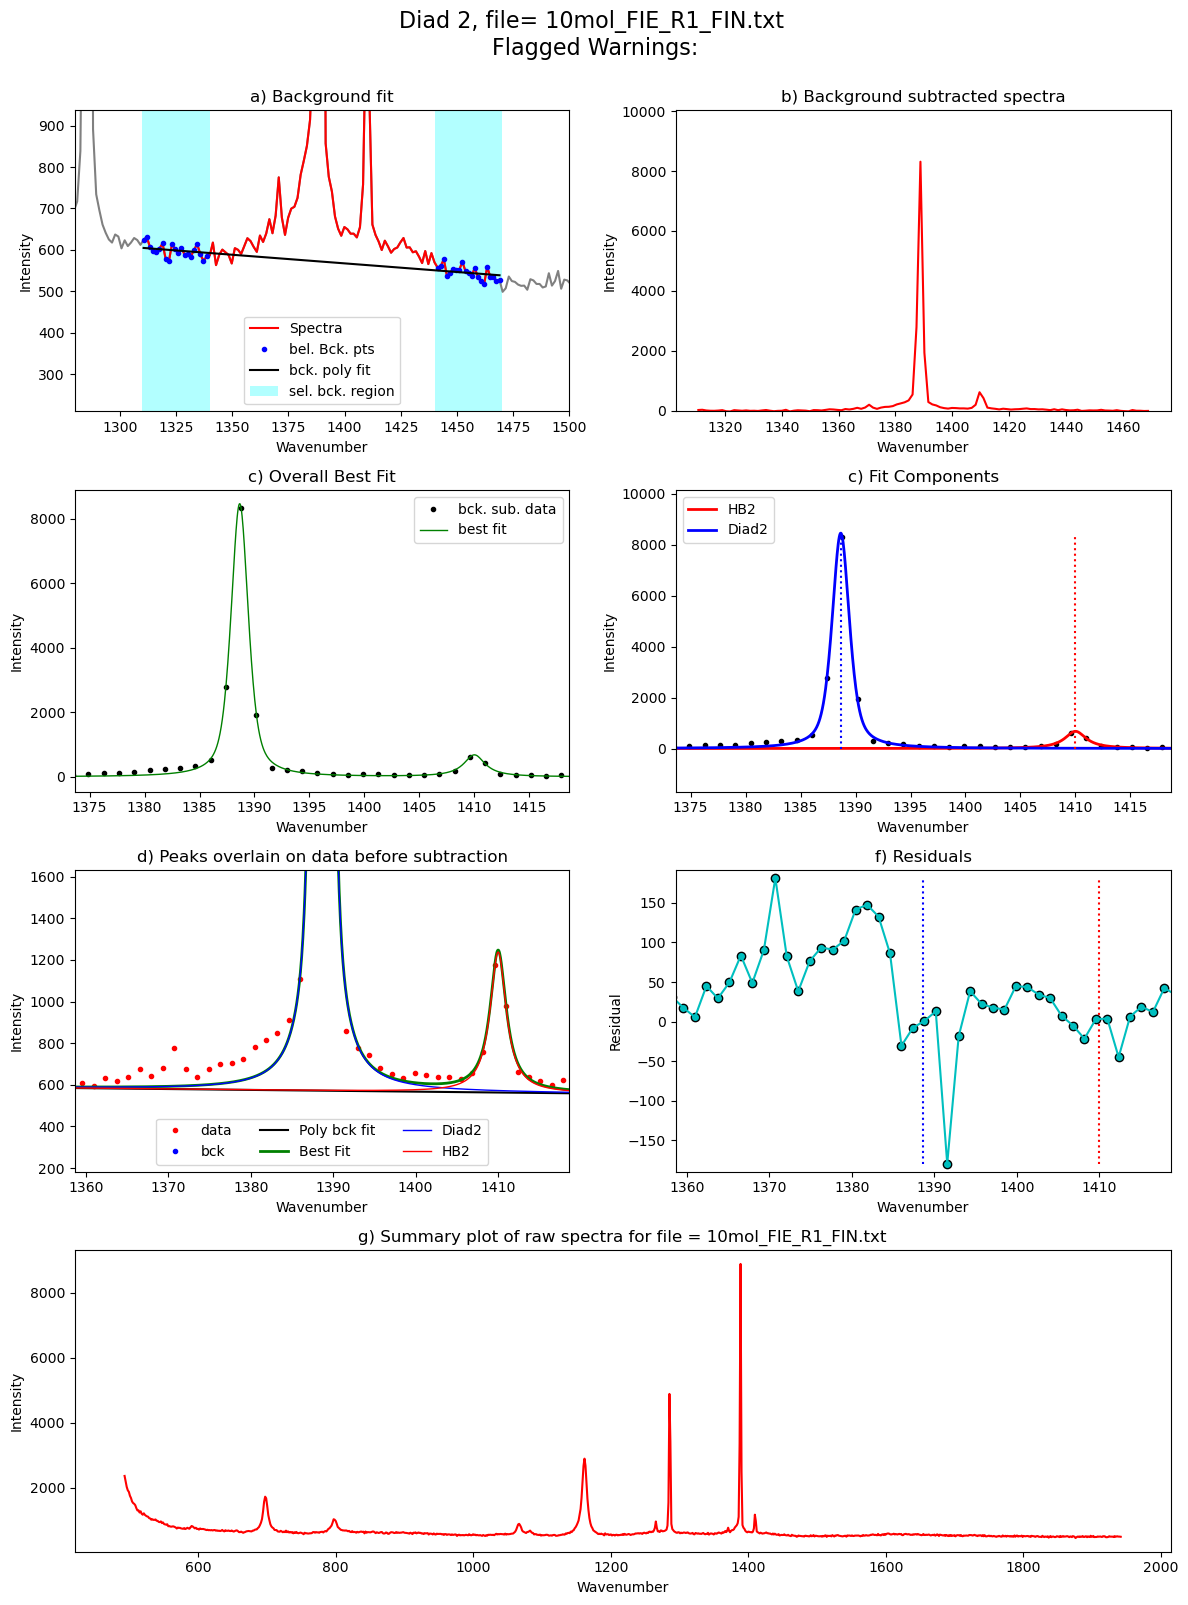

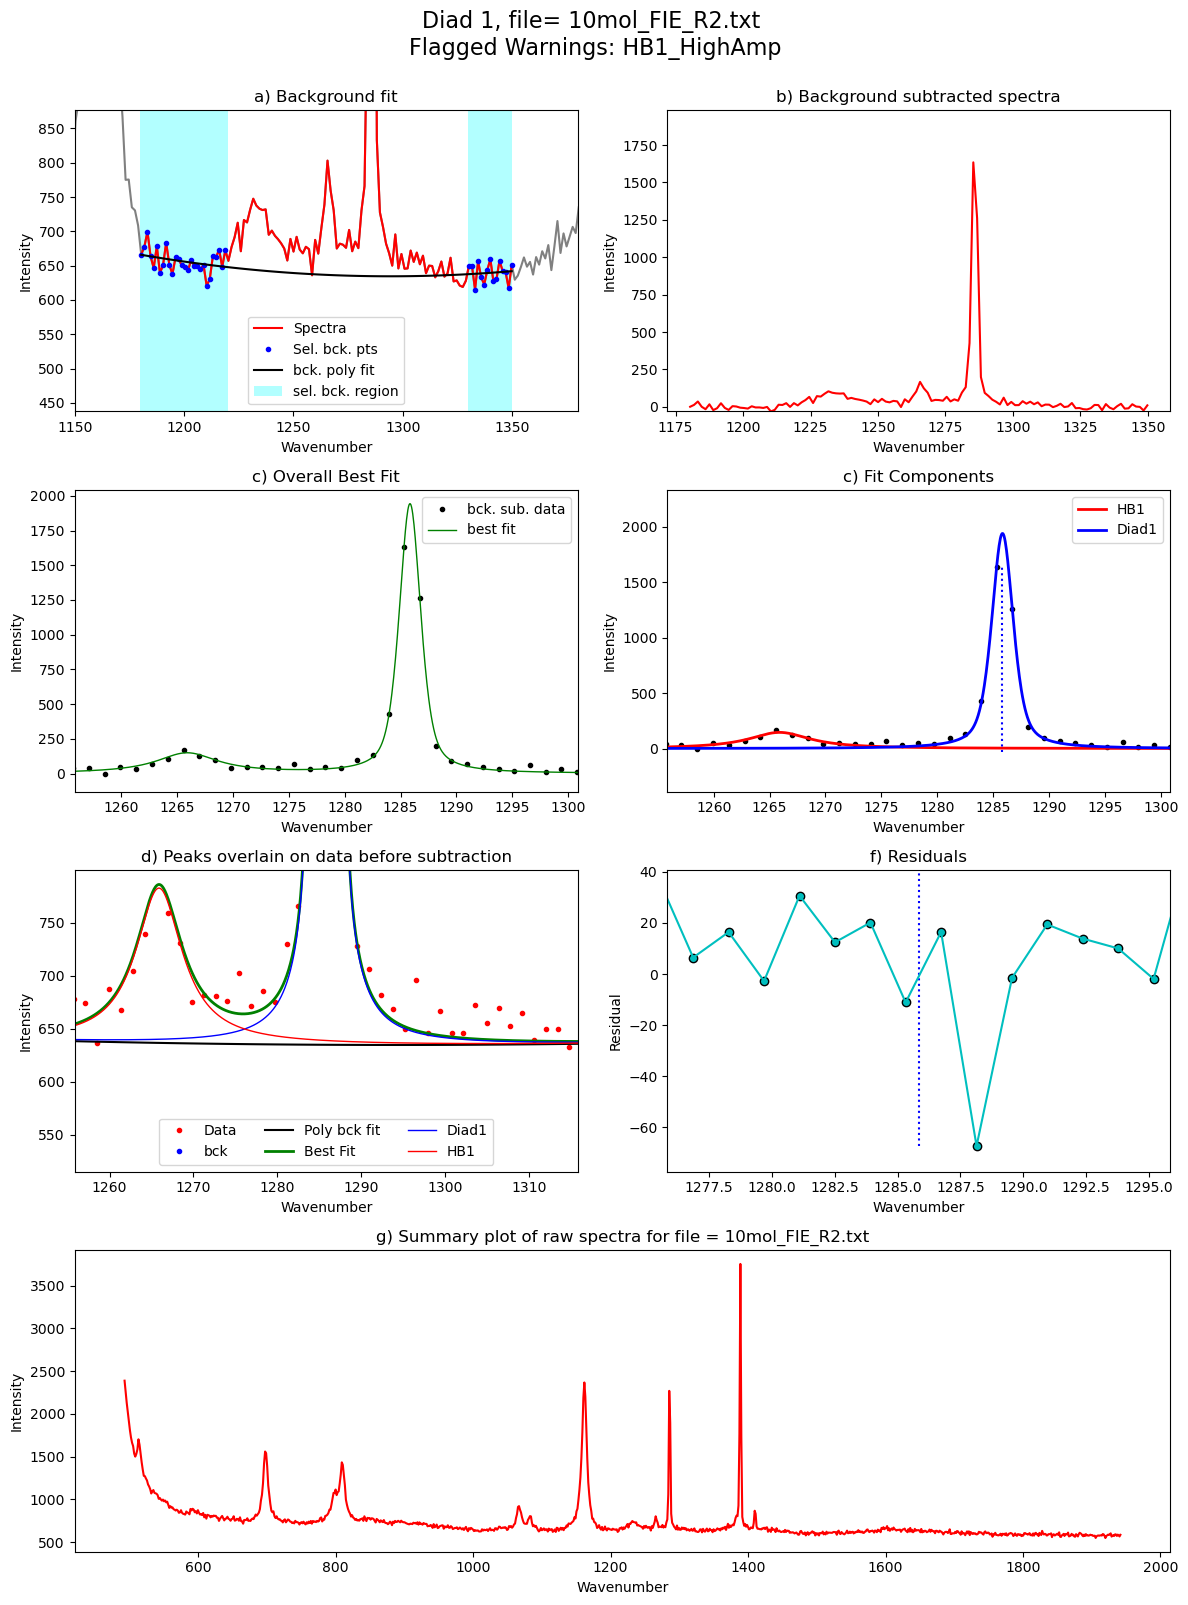

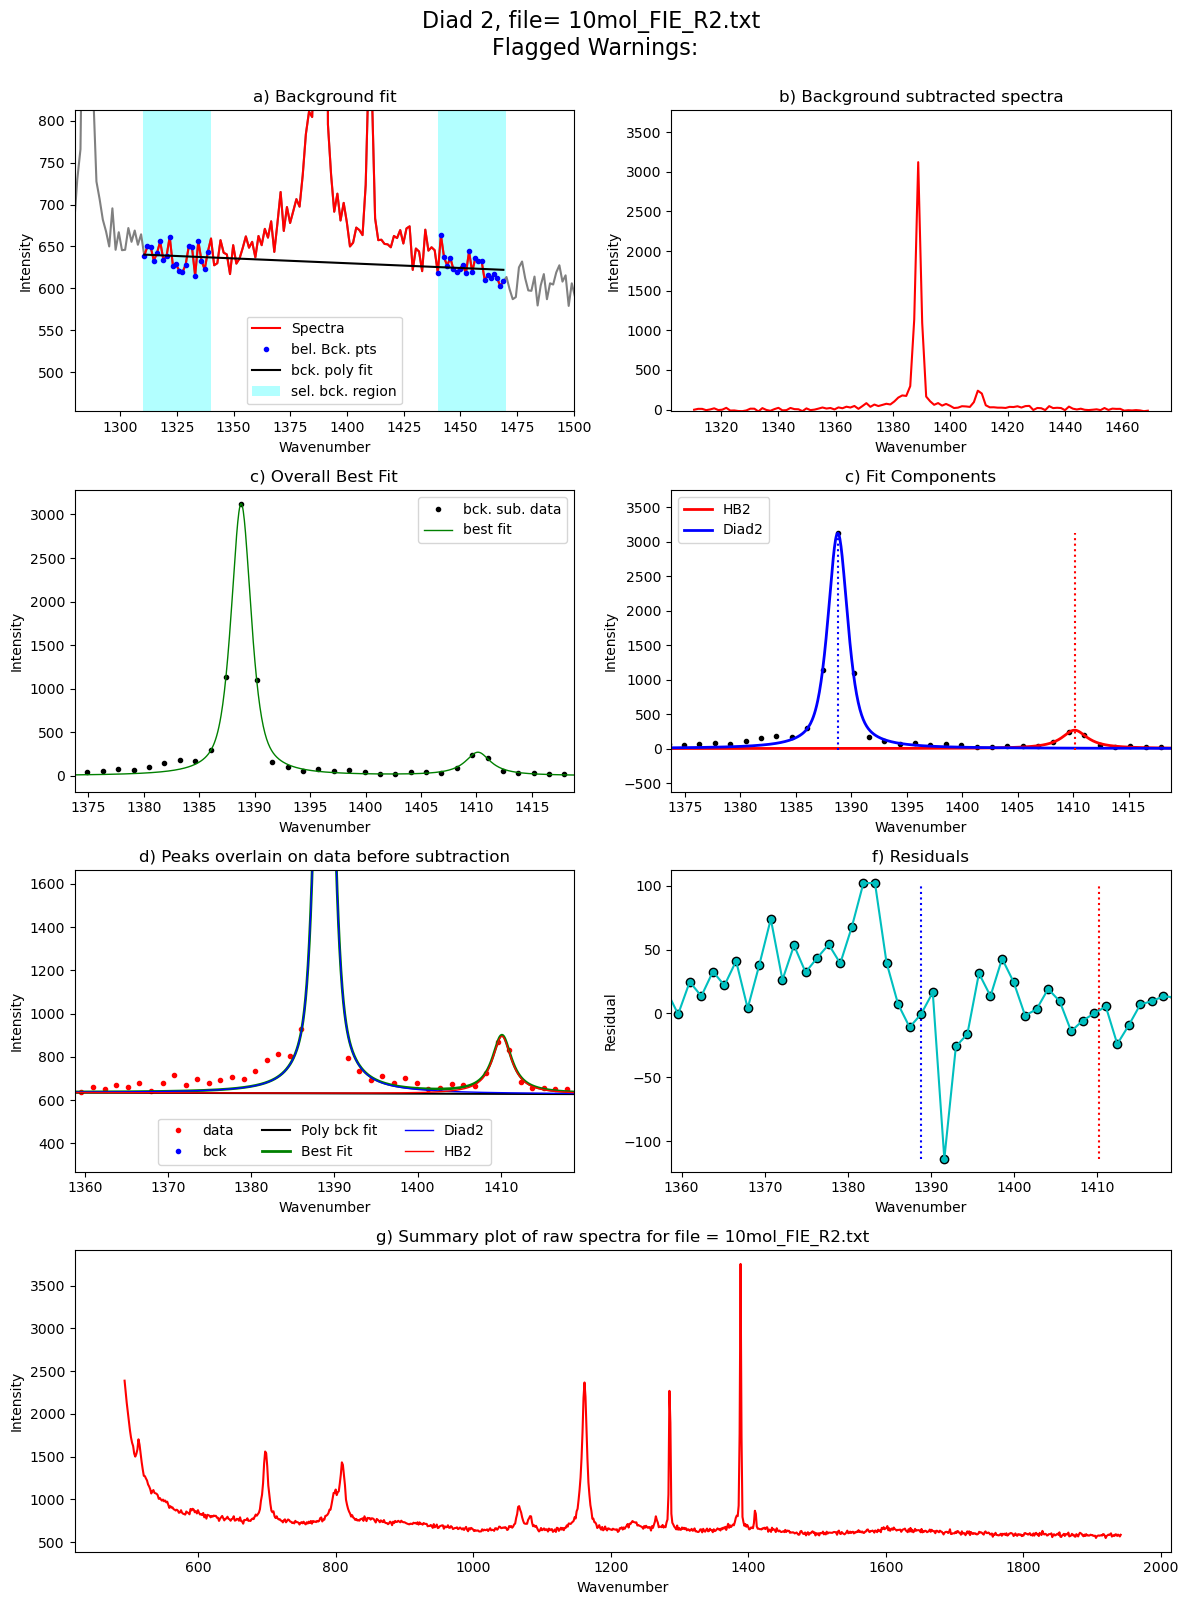

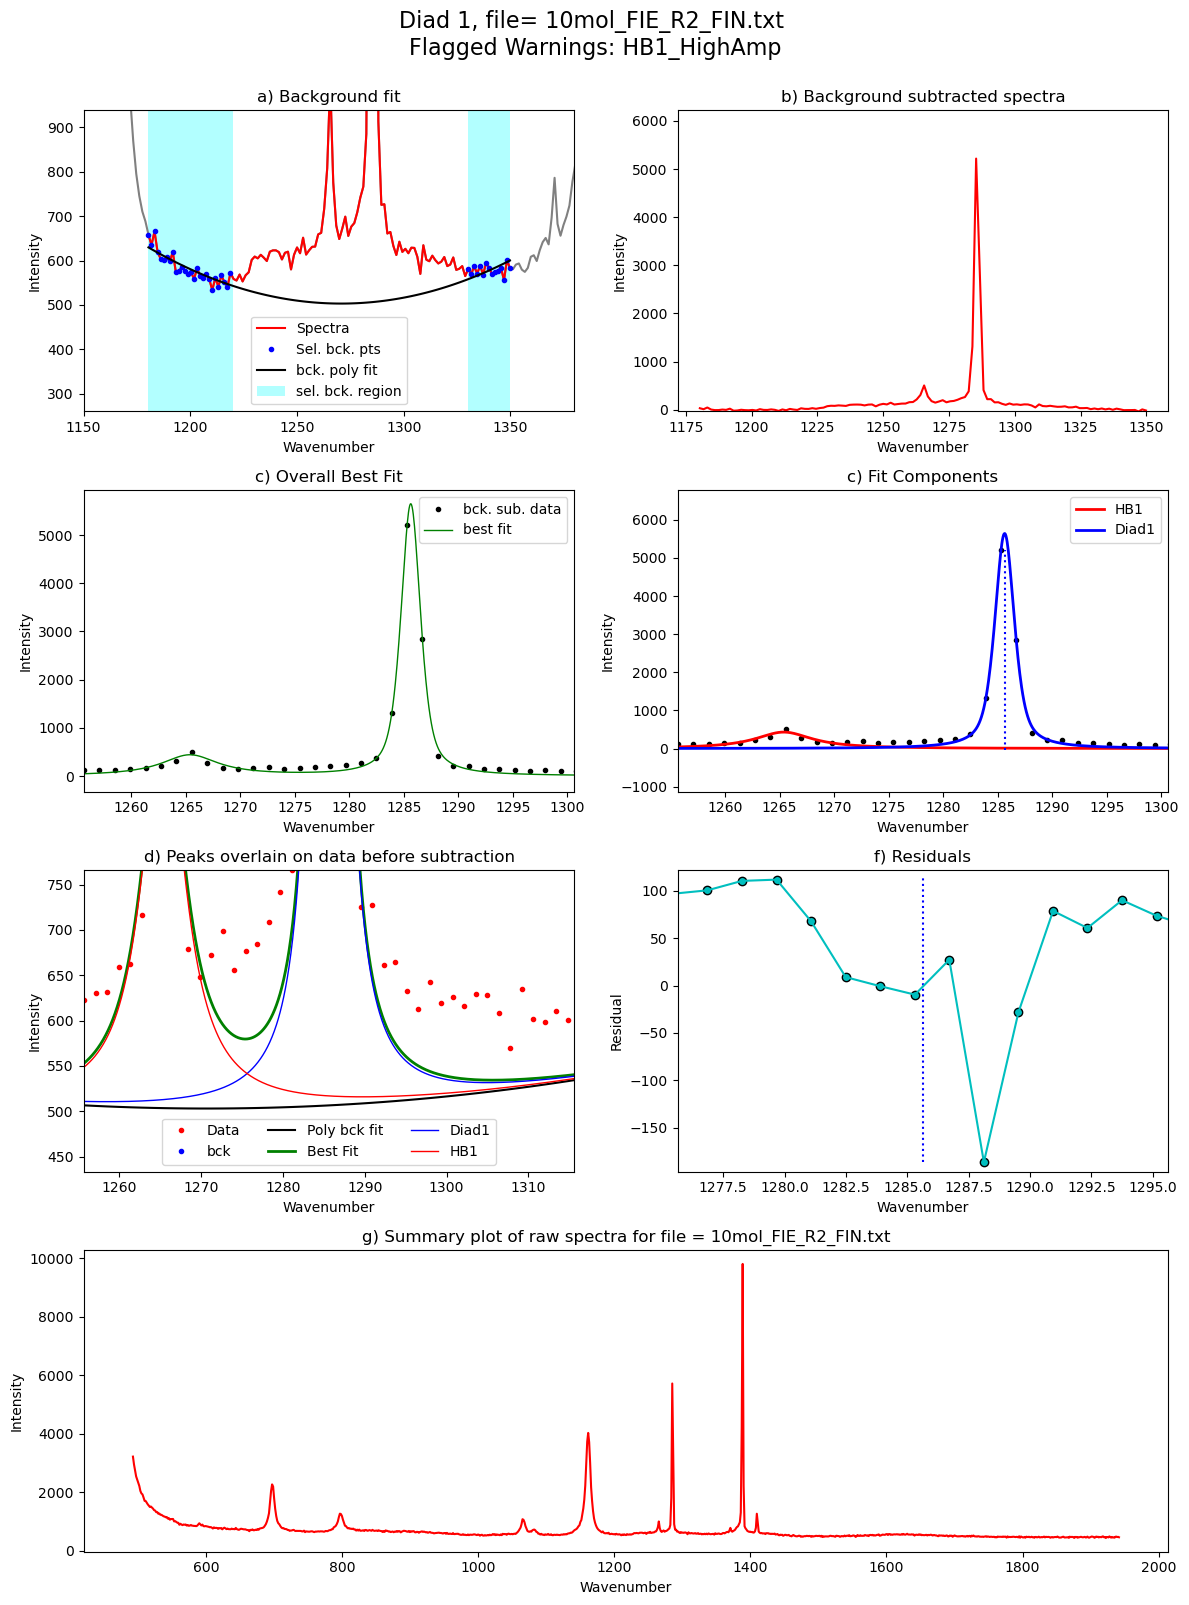

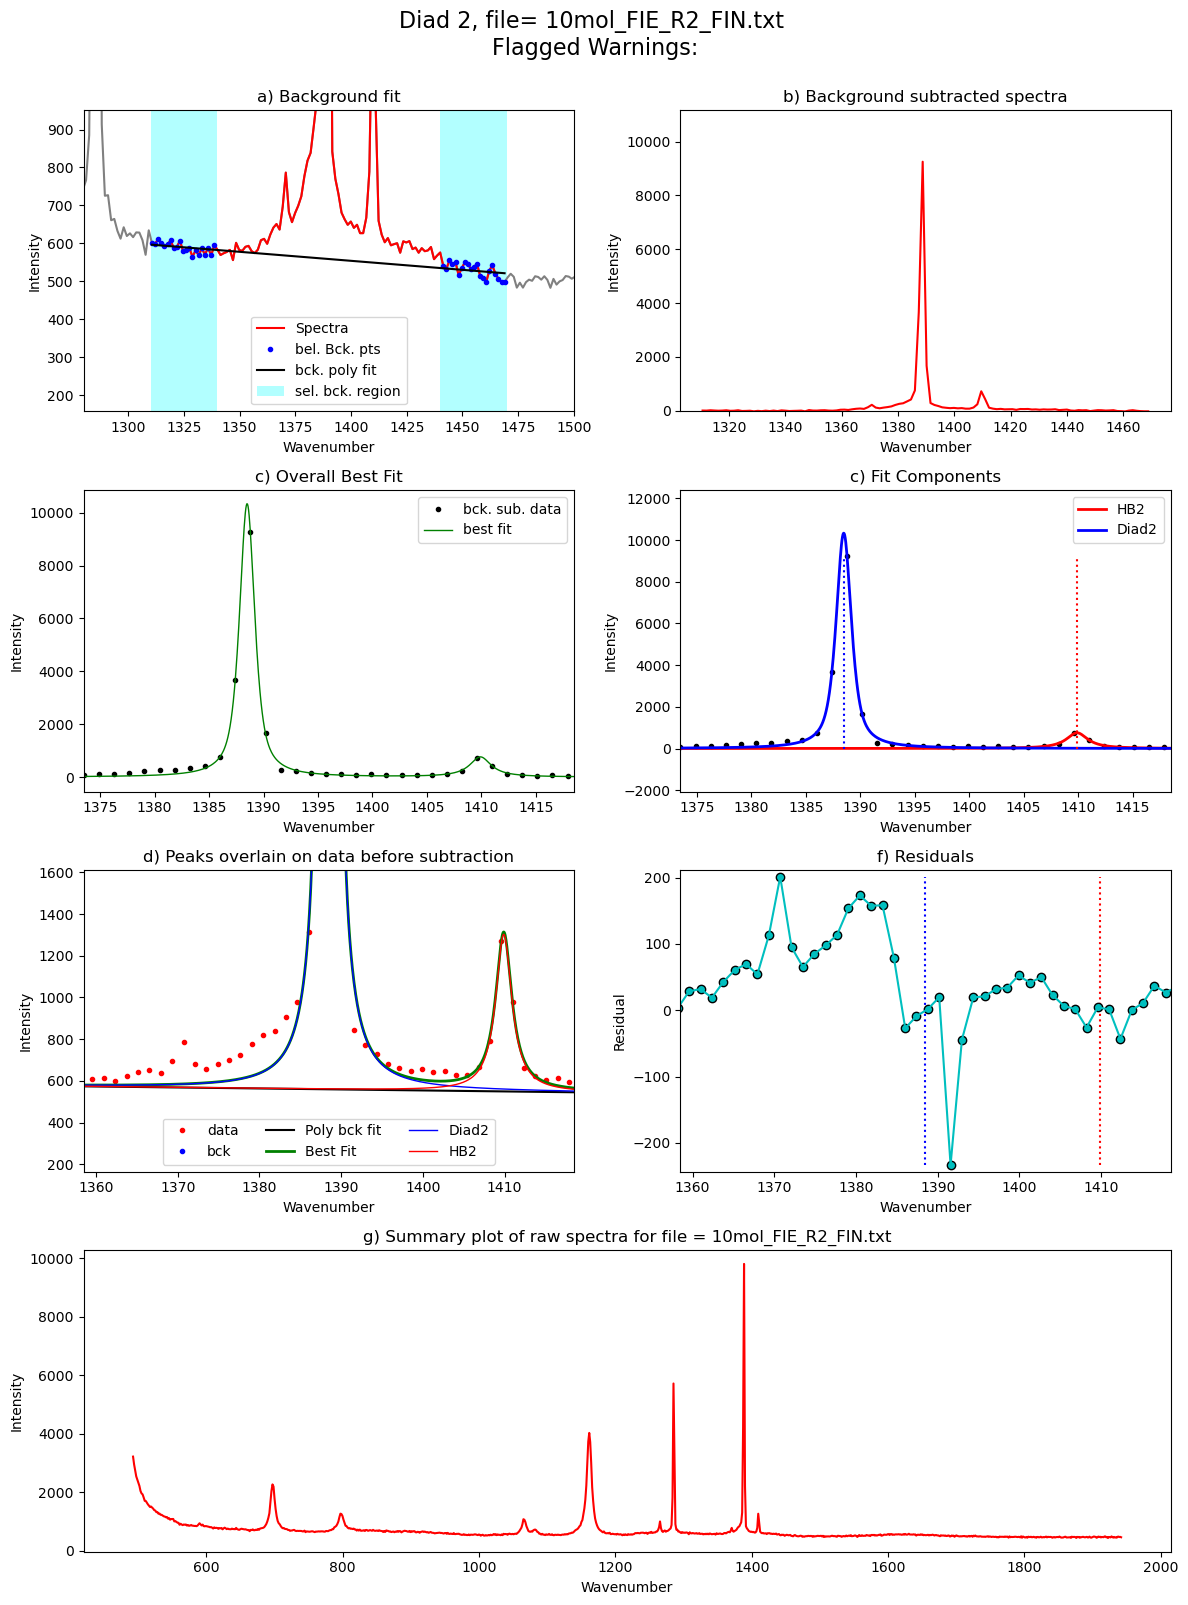

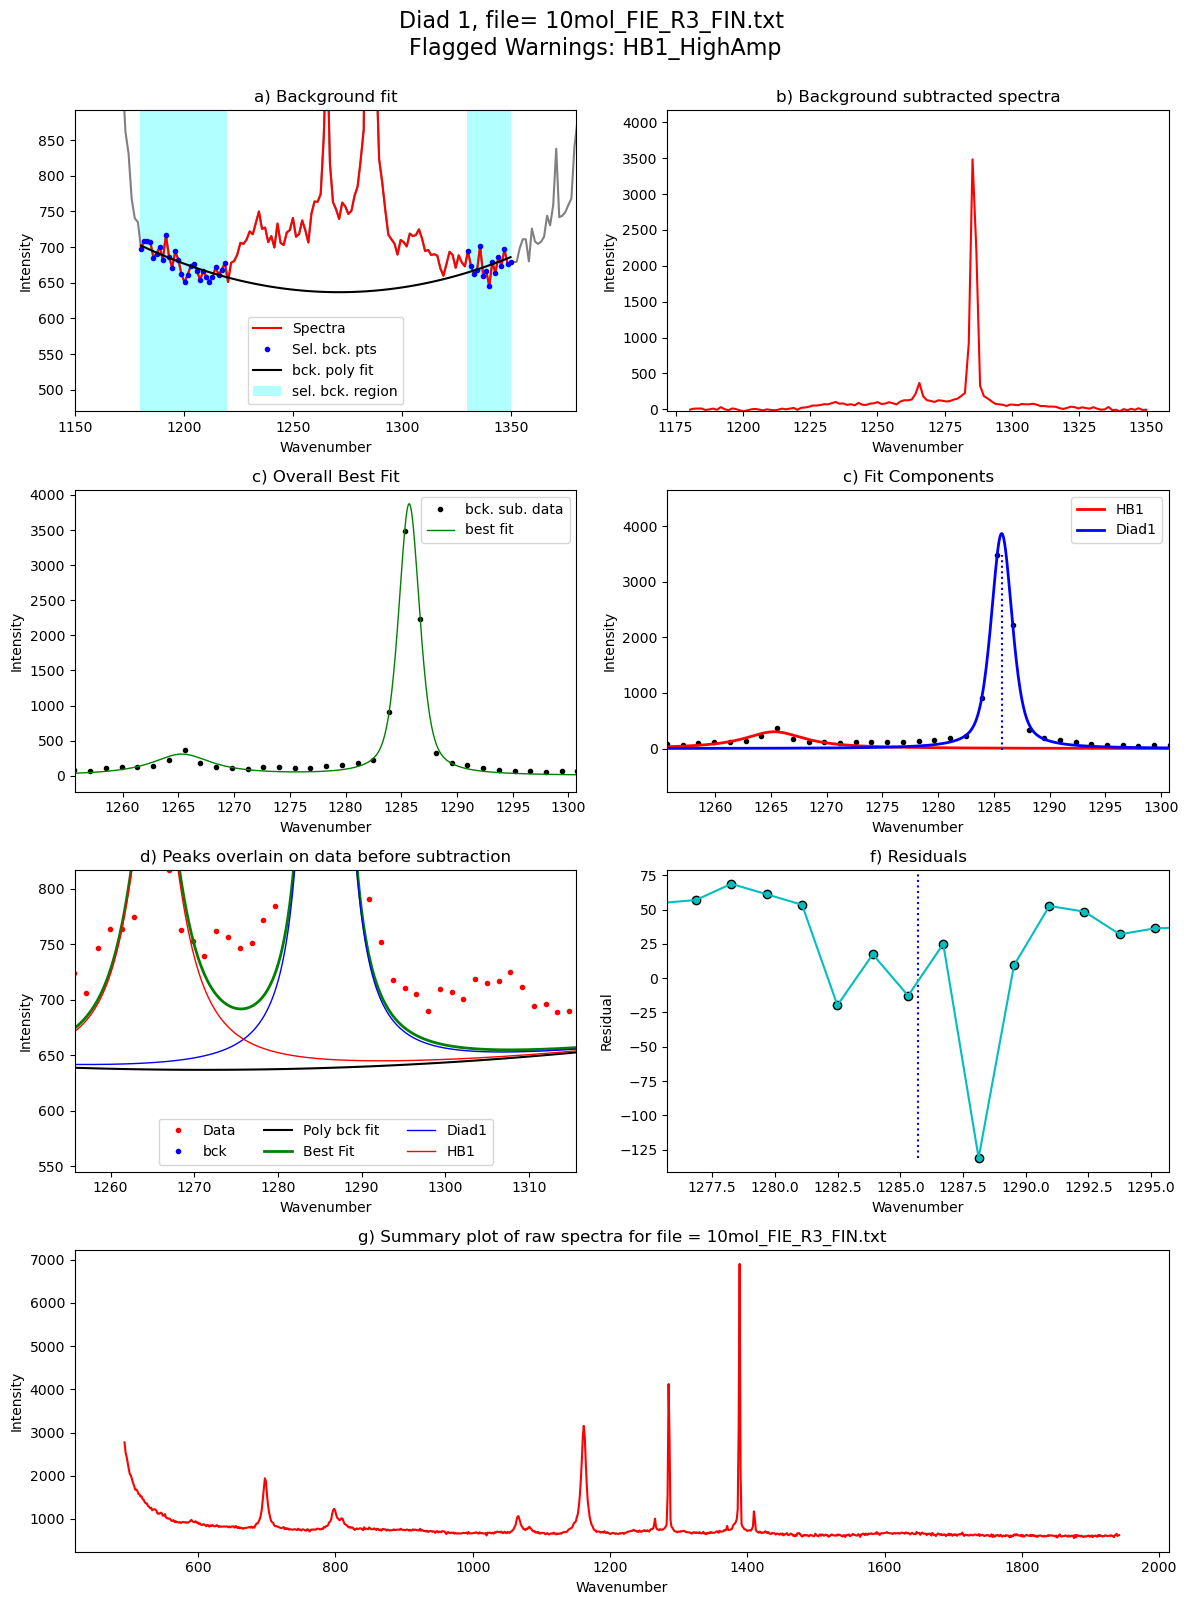

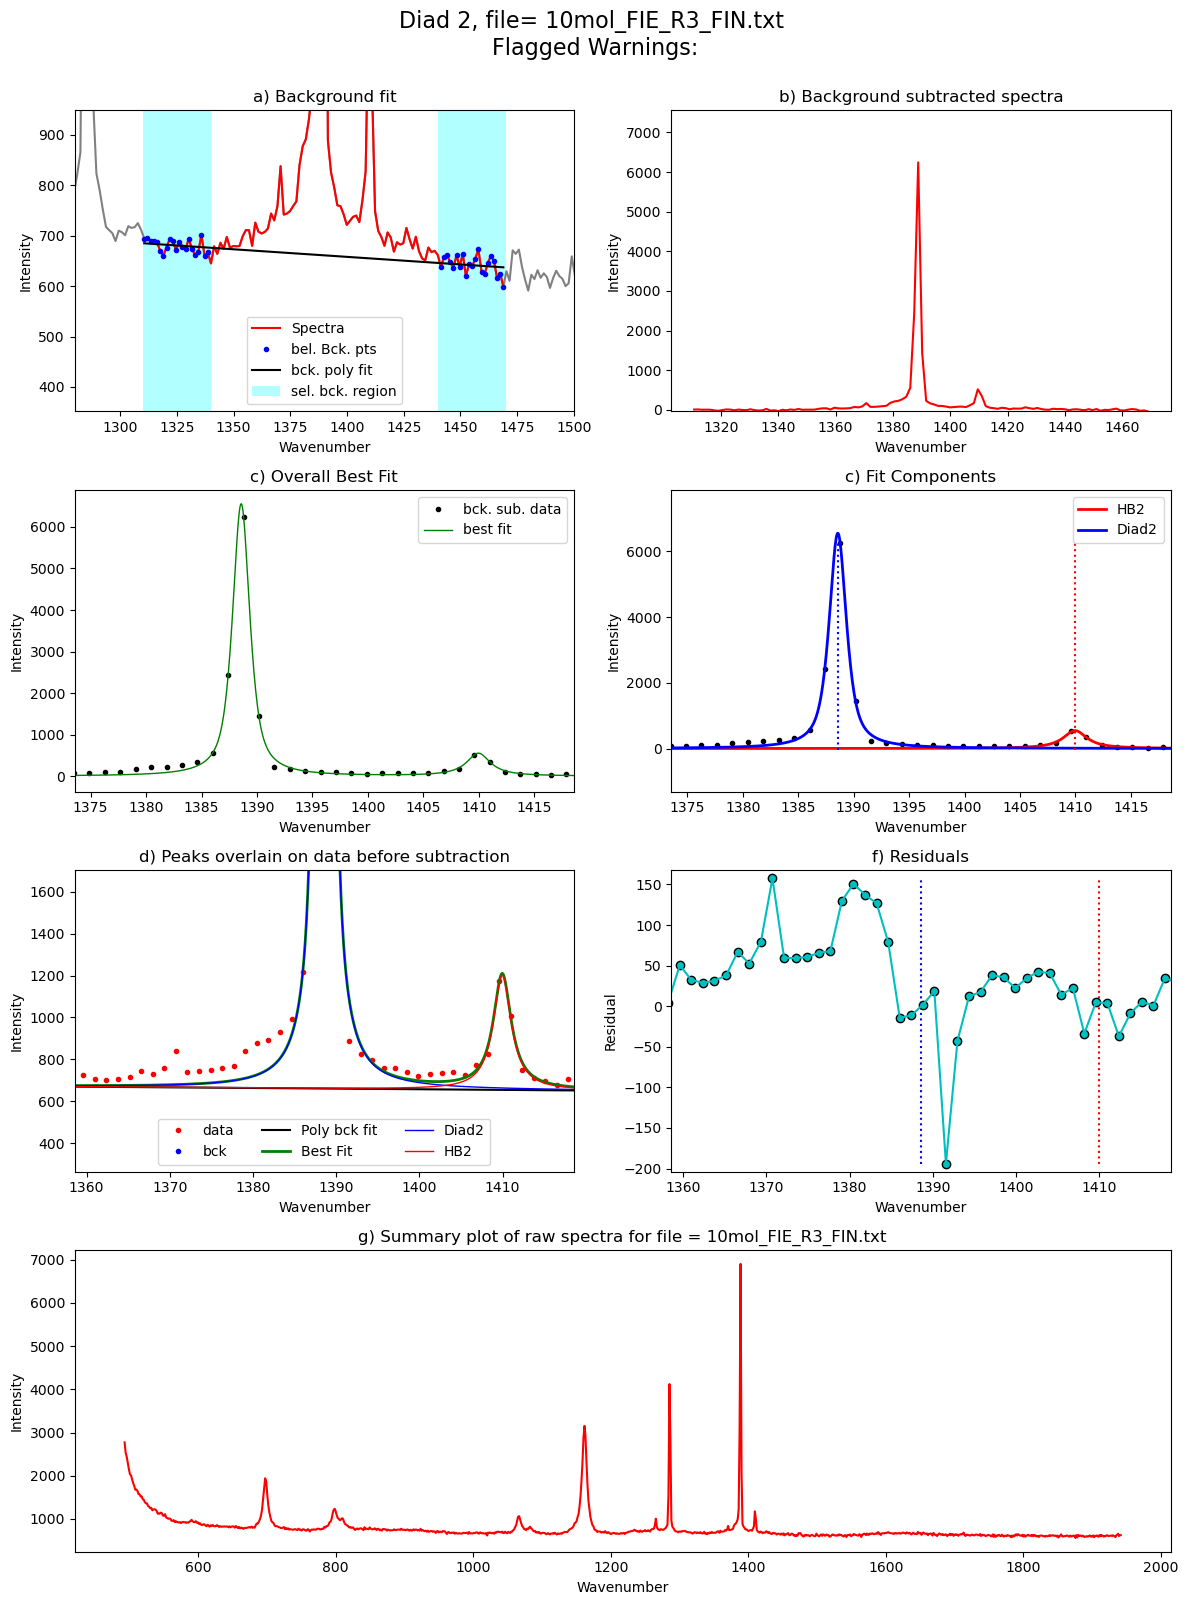

In [30]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


### Get file names that flagged a warning

In [31]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

11
0        10mol_FID_R1
0    10mol_FID_R1_FIN
0        10mol_FID_R2
0    10mol_FID_R2_FIN
0        10mol_FID_R3
0    10mol_FID_R3_FIN
0        10mol_FIE_R1
0    10mol_FIE_R1_FIN
0        10mol_FIE_R2
0    10mol_FIE_R2_FIN
0    10mol_FIE_R3_FIN
Name: filename, dtype: object


### Have a look at different parameters
- This can help you spot really bad fits

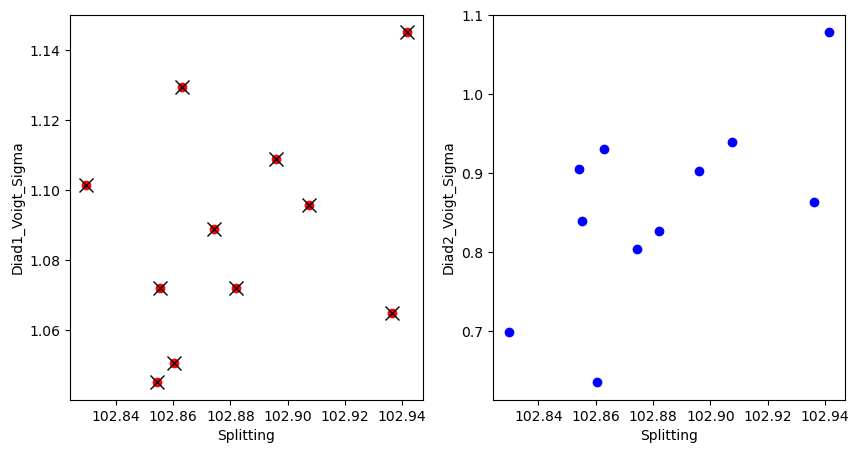

In [32]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

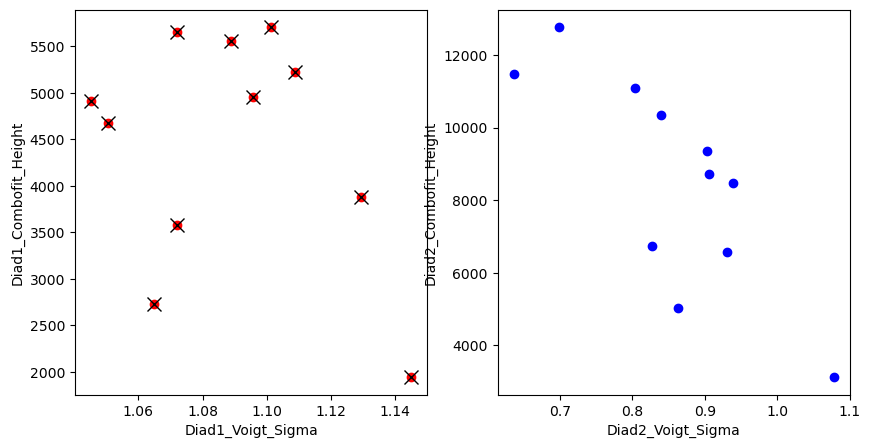

In [33]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [34]:
## Save parameters to excel

In [35]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')